# [EDA with Pandas Profile Report](https://www.kaggle.com/wentzforte/eda-pandas-profiling)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

/kaggle/input/competicao-dsa-machine-learning-dec-2019/dataset_treino.csv
/kaggle/input/competicao-dsa-machine-learning-dec-2019/dataset_teste.csv
/kaggle/input/competicao-dsa-machine-learning-dec-2019/sample_submission.csv


In [2]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[mz_table.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) + " columns that have missing values.")
        return mz_table

In [3]:
def show_corr(df):
    fig = plt.subplots(figsize = (20,20))
    sb.set(font_scale=1.5)
    sb.heatmap(df.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
    plt.show()

In [4]:
def change_types(cols):
    for col in cols:
        labels = train[col].unique()
        map_labels = dict(zip(labels, range(0,len(labels))))
        train[col] = train[col].map(map_labels)
        train[col] = train[col].astype(float)
        
        test[col] = test[col].map(map_labels)
        test[col] = test[col].astype(float)

In [5]:
def change_categorical():
    for col in features_cat:      
        if col in features_ignore:
            continue
        features_ignore.append(col)
        for item in train[col].unique():
            if not item is np.NaN:            
                for i in list(set(str(item))):
                    new_col = col +'_'+ str.upper(str(i).replace(',',''))
                    if not new_col in train.columns:
                        train[new_col] = 0
                        test[new_col] = 0
                        #print('add', new_col)
                    train[new_col] = train[col].apply(lambda x: float(str(x).find(item) >= 0))                 
                    test[new_col] = test[col].apply(lambda x: float(str(x).find(item) >= 0))        

In [6]:
def remove_outlier(df, col):
    if col in features_ignore:
        return
    
    if df[col].dtype == object:
        return   
    
    fig = plt.subplots(figsize = (20,3))
    
    _std = round(df[col].std(), 5)
    _mean= round(df[col].mean(), 5)    
    _min = round(_mean - df[col].std()*3, 5)
    if _min < 0:
        _min = 0.00001
    _max = round(_mean + df[col].std()*3, 5)
    if _max > 20:
        _max = 19.99999
        
    plt.hist(df[col], bins=100)
    
    df.loc[(df[col] < 0) | (df[col] < _min) | (df[col] > _max)] = _mean
    df[col] = round(df[col], 5)
    
    plt.hist(df[col], bins=100)    
    print('Process Remove Outlier', col, '| mean:', _mean, '| std:', _std,
          '| min:', _min, '| max:', _max, '-> min:', df[col].min(), '| max:', df[col].max())
    plt.show()    

In [7]:
train = pd.read_csv("/kaggle/input/competicao-dsa-machine-learning-dec-2019/dataset_treino.csv")
test = pd.read_csv("/kaggle/input/competicao-dsa-machine-learning-dec-2019/dataset_teste.csv")

In [8]:
missing_zero_values_table(train)

Your selected dataframe has 133 columns and 114321 Rows.
There are 119 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
v30,0,60110,52.6,60110,52.6,object
v113,0,55304,48.4,55304,48.4,object
v102,0,51316,44.9,51316,44.9,float64
v85,0,50682,44.3,50682,44.3,float64
v119,0,50680,44.3,50680,44.3,float64
v123,0,50678,44.3,50678,44.3,float64
v51,0,50678,44.3,50678,44.3,float64
v23,0,50675,44.3,50675,44.3,float64
v78,0,49895,43.6,49895,43.6,float64
v16,0,49895,43.6,49895,43.6,float64


In [9]:
train.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74,v75,v76,v77,v78,v79,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,16.434108,6.085711,2.866830,11.636387,1.355013,8.571429,3.670350,0.106720,0.148883,18.869283,7.730923,XDX,-1.716131e-08,C,0.139412,1.720818,3.393503,0.590122,8.880867,C,A,1.083033,1.010829,7.270147,8.375452,11.326592,0.454546,0,4.012088,7.711453,7.653429,12.707581,2.015505,10.498338,9.848672,0.113561,C,12.171733,8.086643,0.899420,7.277792,G,16.747968,0.037096,1.299638,DI,3.971118,0.529802,10.890984,1.588448,15.858152,1,0.153461,6.363189,18.303925,C,9.314079,15.231789,17.142857,11.784549,F,1,1.614988,B,D,2.230940,7.292418,8.571429,E,3.000000,7.528326,8.861647,0.649820,1.299638,1.707317,0.866426,9.551836,3.321300,0.095678,0.905342,A,0.442252,5.814018,3.517720,0.462019,7.436824,5.454545,8.877414,1.191337,19.470199,8.389237,2.757375,4.374296,1.574039,0.007294,12.579184,E,2.382692,3.930922,B,0.433213,O,NaN,15.634907,2.857144,1.951220,6.592012,5.909091,-6.297423e-07,1.059603,0.803572,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,NaN,1.312910,NaN,6.507647,NaN,11.636386,NaN,NaN,NaN,NaN,NaN,NaN,6.763110,GUV,NaN,C,3.056144,NaN,NaN,NaN,NaN,C,A,NaN,NaN,3.615077,NaN,14.579479,NaN,0,NaN,14.305766,NaN,NaN,NaN,NaN,NaN,2.449959,E,NaN,NaN,1.379210,NaN,G,NaN,1.129469,NaN,DY,NaN,NaN,NaN,NaN,NaN,2,2.544736,NaN,NaN,A,NaN,NaN,NaN,12.053353,F,2,NaN,B,D,NaN,NaN,NaN,D,NaN,7.277655,3.430691,NaN,NaN,NaN,NaN,9.848004,NaN,2.678584,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,8.303967,NaN,NaN,NaN,NaN,NaN,NaN,1.505335,NaN,B,1.825361,4.247858,A,NaN,U,G,10.308044,NaN,NaN,10.595357,NaN,NaN,NaN,NaN,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,14.756098,6.384670,2.505589,9.603542,1.984127,5.882353,3.170847,0.244541,0.144258,17.952332,5.245035,FQ,-2.785053e-07,E,0.113997,2.244897,5.306122,0.836005,7.499999,NaN,A,1.454082,1.734693,4.043864,7.959184,12.730517,0.259740,0,7.378964,13.077201,6.173469,12.346939,2.926830,8.897561,5.343819,0.126035,C,12.711328,6.836734,0.604504,9.637627,F,15.102041,0.085573,0.765305,AS,4.030613,4.277456,9.105481,2.151361,16.075602,1,0.123643,5.517949,16.377205,A,8.367347,11.040463,5.882353,8.460654,B,3,2.413618,B,B,1.963971,5.918368,11.764705,E,3.333334,10.194433,8.266200,1.530611,1.530613,2.429906,1.071429,8.447465,3.367346,0.111388,0.811447,G,0.271480,5.156559,4.214944,0.309657,5.663265,5.974026,11.588858,0.841837,15.491329,5.879353,3.292788,5.924457,1.668401,0.008275,11.670572,C,1.375753,1.184211,B,3.367348,S,NaN,11.205561,12.941177,3.129253,3.478911,6.233767,-2.792745e-07,2.138728,2.238806,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,16.347483,9.646653,3.903302,14.094723,1.945044,5.517242,3.610789,1.224114,0.231630,18.376407,7.517125,ACUE,-4.805344e-07,D,0.148843,1.308269,2.303640,8.926662,8.874521,C,B,1.587644,1.666667,8.703550,8.898468,11.302795,0.433735,0,0.287322,11.523045,7.931035,12.935823,1.470878,12.708574,9.670823,0.108387,C,12.194855,8.591954,3.329176,4.780357,H,16.621695,0.139721,1.178161,BW,3.965517,1.732102,11.777912,1.229246,15.927390,1,0.140260,6.292979,17.011645,A,9.703065,18.568129,9.425288,13.594728,F,2,2.272541,B,D,2.188198,8.213602,13.448277,B,1.947261,4.797873,13.315819,1.681034,1.379310,1.587045,1.242817,10.

In [10]:
test.head()

,ID,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74,v75,v76,v77,v78,v79,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,0,1.375465e+00,11.361141,C,4.200778,6.57700,2.081784,1.784386,0.011094,9.523810,1.312911,16.851853,6.961173,3.107462,12.230137,1.773050,2.857142,3.493816,0.096826,0.225481,17.910227,7.437806,AFPB,9.558310e-07,E,0.069180,0.954152,4.386616,0.573017,6.988848,NaN,A,1.115242,2.081784,5.228503,8.178438,12.183225,8.333339e-01,0,2.842768e+00,11.754576,6.765800,10.855019,1.296297,10.613377,9.417172,0.100480,J,12.774528,7.509293,0.118847,8.590755,C,17.021277,0.044313,1.338291,AF,2.602230,2.919712e-01,9.038609,0.817843,14.911512,1,0.091466,5.967949,15.611474,A,8.029739,15.912409,8.571429,11.222210,F,1,1.929013,B,D,2.146860,6.171004,15.714287,Q,1.904761,8.918731,8.750729,2.453532,0.892192,1.860465,-0.892193,7.904968,1.784387,0.105298,0.988980,B,0.658269,4.929298,2.992365,0.759955,5.947955,4.999999,10.013503,0.817844,19.708030,4.186787,1.873945,4.129022,1.701894,0.004535,11.688117,B,1.502480,2.121710,A,3.568773,U,NaN,12.246698,11.428572,1.276596,4.777902,5.833334,-9.974950e-07,1.459854,3.267328,7.619048,1.815241,1.112270e-07,AF,1.292368,3.903345,1.485925,0,2.333334,1.428572e+00
1,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,1.291029,NaN,6.618289,NaN,10.760796,NaN,NaN,NaN,NaN,NaN,NaN,5.895192,FOG,NaN,D,NaN,NaN,NaN,NaN,NaN,A,A,NaN,NaN,8.387431,NaN,NaN,NaN,4,NaN,6.737574,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,1.027070,NaN,A,NaN,NaN,NaN,DI,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,C,NaN,NaN,NaN,NaN,F,5,NaN,B,D,NaN,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,NaN,NaN,B,NaN,E,NaN,16.284938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I,NaN,NaN,NaN,0,NaN,NaN
2,2,-4.903407e-07,8.201529,C,4.544371,6.55010,1.558442,2.467532,0.007164,7.142858,1.575492,15.142858,6.894249,1.899789,13.306189,1.302083,3.333334,3.177414,0.070676,0.172391,17.537549,8.253452,HXZ,-2.137218e-07,B,0.059620,2.857142,2.207792,0.327134,8.311689,C,A,0.974026,1.558442,7.958990,8.311689,12.195123,-5.249334e-07,0,6.707352e+00,7.701325,6.883118,12.077923,3.428570,10.215687,7.908401,0.082194,I,12.770831,7.792207,0.840731,9.885153,A,15.000000,0.020126,0.779222,DO,5.454544,-8.476044e-07,9.452010,2.857142,15.561143,1,0.083718,5.633655,15.778656,C,9.090908,13.200000,6.666666,7.860585,F,1,1.488096,B,D,1.910292,5.714285,16.666667,C,1.428572,8.952301,8.744891,1.948051,0.779221,1.860465,0.779221,5.886226,5.714285,0.043851,0.918734,C,0.552642,4.350983,3.163664,0.604966,6.233767,12.631578,10.214574,0.952380,19.799999,6.535555,0.762963,4.917534,1.981859,0.002794,11.747048,D,1.188768,2.088817,A,3.116883,Q,AJ,15.622710,13.333334,3.750001,4.740574,12.631580,4.910660e-08,0.600000,2.500001,5.714286,1.970928,1.412265e-02,AV,1.128724,5.844156,1.475892,0,1.263157,-6.380022e-07
3,7,2.661870e+00,3.041241,C,1.657216,9.77308,2.078337,1.430855,1.252157,7.959596,1.575493,14.424357,6.856236,5.086604,10.397026,2.803497,7.302904,1.121984,0.608524,0.476554,15.285588,5.539484,AGMU,5.863396e-07,E,1.779993,1.406875,1.350919,5.347444,6.474820,E,A,2.362111,3.852918,6.223849,6.634692,13.741929,2.011174e+00,0,8.248888e-07,10.444974,6.059153,13.189448,1.826832,7.635934,12.850679,1.504218,I,16.791675,7.801759,0.946373,8.578365,A,15.382717,1.351259,3.812951,CN,4.356514,1.953542e+01,10.425885,1.128431,10.935236,1,1.809689,2.181748,12.366115,B,8.401279,17.677120,13.195021,14.124303,F,1,3.905010,B,D,0.644581,6.370902,11.203320,C,3.555555,6.284919,3.264427,3.237409,4.220623,6.000001,1.306954,13.037068,0.431654,2.035947,1.495102,B,0.775499,3

In [11]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,114321.0,114228.928228,65934.487362,3.000000e+00,5.728000e+04,1.141890e+05,1.712060e+05,228713.000000
target,114321.0,0.761199,0.426353,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
v1,64489.0,1.630686,1.082813,-9.996497e-07,9.135798e-01,1.469550e+00,2.136128e+00,20.000001
v2,64525.0,7.464411,2.961676,-9.817614e-07,5.316428e+00,7.023803e+00,9.465497e+00,20.000000
v4,64525.0,4.145098,1.148263,-6.475929e-07,3.487398e+00,4.205991e+00,4.833250e+00,20.000000
v5,65697.0,8.742359,2.036018,-5.287068e-07,7.605918e+00,8.670867e+00,9.771353e+00,20.000000
v6,64489.0,2.436402,0.599965,-9.055091e-07,2.065064e+00,2.412790e+00,2.775285e+00,20.000001
v7,64489.0,2.483921,0.589449,-9.468765e-07,2.101477e+00,2.452166e+00,2.834285e+00,20.000000
v8,65702.0,1.496569,2.783003,-7.783778e-07,8.658986e-02,3.860317e-01,1.625246e+00,20.000001
v9,64470.0,9.031859,1.930262,-9.828757e-07,7.853659e+00,9.059582e+00,1.023256e+01,20.000001


In [12]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,114393.0,114483.991477,66113.754997,0.000000e+00,5.707400e+04,1.145130e+05,1.718380e+05,228709.000000
v1,64514.0,1.628623,1.072868,-9.974864e-07,9.164895e-01,1.462450e+00,2.134102e+00,14.799999
v2,64554.0,7.436088,2.942779,-3.341912e-07,5.303272e+00,6.985397e+00,9.420643e+00,19.658686
v4,64554.0,4.141265,1.149141,-1.225209e-08,3.484916e+00,4.202803e+00,4.827959e+00,20.000000
v5,65751.0,8.739797,2.051298,4.236715e-01,7.585744e+00,8.648951e+00,9.784119e+00,19.993275
v6,64514.0,2.435884,0.586935,-9.873300e-07,2.063175e+00,2.410546e+00,2.775445e+00,7.292818
v7,64514.0,2.482134,0.592498,-8.716865e-07,2.095634e+00,2.450766e+00,2.832164e+00,20.000000
v8,65757.0,1.512246,2.804064,-2.001387e-07,8.566530e-02,3.827960e-01,1.645660e+00,20.000001
v9,64507.0,9.031840,1.923532,-9.049570e-07,7.843138e+00,9.074074e+00,1.023697e+01,20.000001
v10,114311.0,1.882422,1.397798,-9.669047e-07,1.050328e+00,1.312910e+00,2.100657e+00,20.000000


In [13]:
train.dtypes

ID          int64
target      int64
v1        float64
v2        float64
v3         object
v4        float64
v5        float64
v6        float64
v7        float64
v8        float64
v9        float64
v10       float64
v11       float64
v12       float64
v13       float64
v14       float64
v15       float64
v16       float64
v17       float64
v18       float64
v19       float64
v20       float64
v21       float64
v22        object
v23       float64
v24        object
v25       float64
v26       float64
v27       float64
v28       float64
v29       float64
v30        object
v31        object
v32       float64
v33       float64
v34       float64
v35       float64
v36       float64
v37       float64
v38         int64
v39       float64
v40       float64
v41       float64
v42       float64
v43       float64
v44       float64
v45       float64
v46       float64
v47        object
v48       float64
v49       float64
v50       float64
v51       float64
v52        object
v53       float64
v54       

In [14]:
features_cat = []
for col in train.columns:
    if train[col].dtype == 'O':
        features_cat.append(col)
print(features_cat)

['v3', 'v22', 'v24', 'v30', 'v31', 'v47', 'v52', 'v56', 'v66', 'v71', 'v74', 'v75', 'v79', 'v91', 'v107', 'v110', 'v112', 'v113', 'v125']


In [15]:
features_ignore = ['ID', 'v22', 'v10', 'v109', 'v104', 'v105', 'v15', 'v121', 'v114', 'v29', 'v26', 
                   'v25', 'v41', 'v11', 'v46', 'v33', 'v26', 'v54', 'v17', 'v20', 'v41', 
                   'v32', 'v64','v67', 'v63', 'v55', 'v32', 'v63', 'v92', 'v41', 'v118']

In [16]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,114321.0,114228.928228,65934.487362,3.000000e+00,5.728000e+04,1.141890e+05,1.712060e+05,228713.000000
target,114321.0,0.761199,0.426353,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
v1,64489.0,1.630686,1.082813,-9.996497e-07,9.135798e-01,1.469550e+00,2.136128e+00,20.000001
v2,64525.0,7.464411,2.961676,-9.817614e-07,5.316428e+00,7.023803e+00,9.465497e+00,20.000000
v4,64525.0,4.145098,1.148263,-6.475929e-07,3.487398e+00,4.205991e+00,4.833250e+00,20.000000
v5,65697.0,8.742359,2.036018,-5.287068e-07,7.605918e+00,8.670867e+00,9.771353e+00,20.000000
v6,64489.0,2.436402,0.599965,-9.055091e-07,2.065064e+00,2.412790e+00,2.775285e+00,20.000001
v7,64489.0,2.483921,0.589449,-9.468765e-07,2.101477e+00,2.452166e+00,2.834285e+00,20.000000
v8,65702.0,1.496569,2.783003,-7.783778e-07,8.658986e-02,3.860317e-01,1.625246e+00,20.000001
v9,64470.0,9.031859,1.930262,-9.828757e-07,7.853659e+00,9.059582e+00,1.023256e+01,20.000001


In [17]:
%%time
#changeTypes(features_cat)
change_categorical()

CPU times: user 1min 59s, sys: 2.07 s, total: 2min 1s
Wall time: 2min 1s


In [18]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,114321.0,114228.928228,65934.487362,3.000000e+00,5.728000e+04,1.141890e+05,1.712060e+05,228713.000000
target,114321.0,0.761199,0.426353,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
v1,64489.0,1.630686,1.082813,-9.996497e-07,9.135798e-01,1.469550e+00,2.136128e+00,20.000001
v2,64525.0,7.464411,2.961676,-9.817614e-07,5.316428e+00,7.023803e+00,9.465497e+00,20.000000
v4,64525.0,4.145098,1.148263,-6.475929e-07,3.487398e+00,4.205991e+00,4.833250e+00,20.000000
v5,65697.0,8.742359,2.036018,-5.287068e-07,7.605918e+00,8.670867e+00,9.771353e+00,20.000000
v6,64489.0,2.436402,0.599965,-9.055091e-07,2.065064e+00,2.412790e+00,2.775285e+00,20.000001
v7,64489.0,2.483921,0.589449,-9.468765e-07,2.101477e+00,2.452166e+00,2.834285e+00,20.000000
v8,65702.0,1.496569,2.783003,-7.783778e-07,8.658986e-02,3.860317e-01,1.625246e+00,20.000001
v9,64470.0,9.031859,1.930262,-9.828757e-07,7.853659e+00,9.059582e+00,1.023256e+01,20.000001


In [19]:
features = []
for col in test.columns:
    if col not in features_ignore:
        features.append(col)
features_train = features + ['target']
print(features_train)

['v1', 'v2', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v12', 'v13', 'v14', 'v16', 'v18', 'v19', 'v21', 'v23', 'v27', 'v28', 'v34', 'v35', 'v36', 'v37', 'v38', 'v39', 'v40', 'v42', 'v43', 'v44', 'v45', 'v48', 'v49', 'v50', 'v51', 'v53', 'v57', 'v58', 'v59', 'v60', 'v61', 'v62', 'v65', 'v68', 'v69', 'v70', 'v72', 'v73', 'v76', 'v77', 'v78', 'v80', 'v81', 'v82', 'v83', 'v84', 'v85', 'v86', 'v87', 'v88', 'v89', 'v90', 'v93', 'v94', 'v95', 'v96', 'v97', 'v98', 'v99', 'v100', 'v101', 'v102', 'v103', 'v106', 'v108', 'v111', 'v115', 'v116', 'v117', 'v119', 'v120', 'v122', 'v123', 'v124', 'v126', 'v127', 'v128', 'v129', 'v130', 'v131', 'v3_C', 'v3_A', 'v3_B', 'v24_C', 'v24_E', 'v24_D', 'v24_A', 'v24_B', 'v30_C', 'v30_G', 'v30_D', 'v30_B', 'v30_F', 'v30_A', 'v30_E', 'v31_A', 'v31_B', 'v31_C', 'v47_C', 'v47_E', 'v47_I', 'v47_D', 'v47_F', 'v47_G', 'v47_J', 'v47_B', 'v47_A', 'v47_H', 'v52_G', 'v52_F', 'v52_H', 'v52_K', 'v52_A', 'v52_C', 'v52_E', 'v52_J', 'v52_D', 'v52_I', 'v52_L', 'v52_B', 'v56_I', 'v56

In [20]:
missing_zero_values_table(train)

Your selected dataframe has 327 columns and 114321 Rows.
There are 119 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
v30,0,60110,52.6,60110,52.6,object
v113,0,55304,48.4,55304,48.4,object
v102,0,51316,44.9,51316,44.9,float64
v85,0,50682,44.3,50682,44.3,float64
v119,0,50680,44.3,50680,44.3,float64
v123,0,50678,44.3,50678,44.3,float64
v51,0,50678,44.3,50678,44.3,float64
v23,0,50675,44.3,50675,44.3,float64
v78,0,49895,43.6,49895,43.6,float64
v16,0,49895,43.6,49895,43.6,float64


In [21]:
train.columns[2:132]

Index(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       ...
       'v121', 'v122', 'v123', 'v124', 'v125', 'v126', 'v127', 'v128', 'v129',
       'v130'],
      dtype='object', length=130)

Process Remove Outlier v1 | mean: 1.63069 | std: 1.08281 | min: 1e-05 | max: 4.87913 -> min: 0.0902 | max: 4.87425


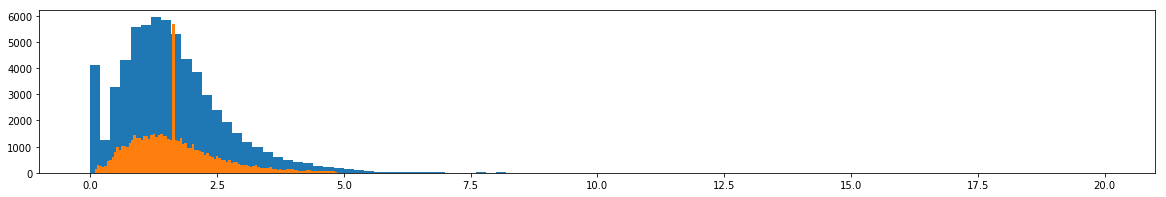

Process Remove Outlier v2 | mean: 7.01713 | std: 3.17189 | min: 1e-05 | max: 16.53281 -> min: 0.63957 | max: 16.52418


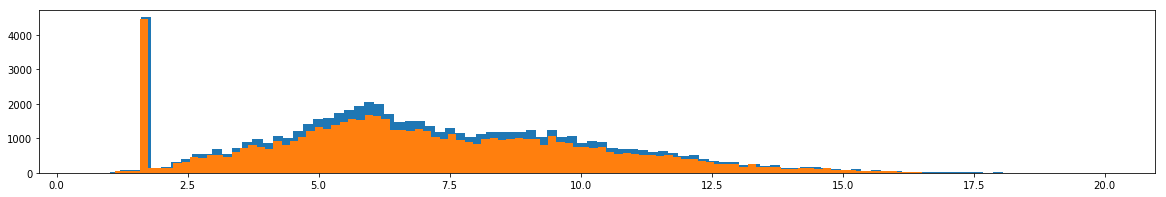

Process Remove Outlier v4 | mean: 3.96528 | std: 1.27018 | min: 0.15475 | max: 7.77581 -> min: 0.20227 | max: 7.76415


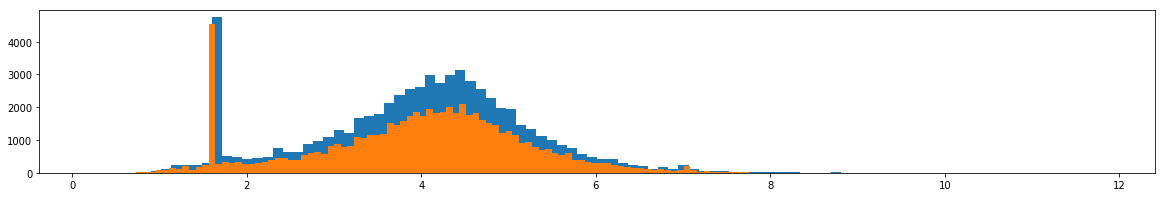

Process Remove Outlier v5 | mean: 8.31027 | std: 2.66446 | min: 0.3169 | max: 16.30364 -> min: 1.12979 | max: 16.29455


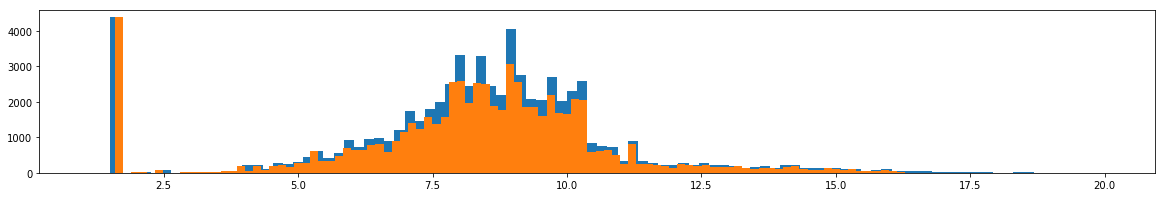

Process Remove Outlier v6 | mean: 2.42422 | std: 0.7369 | min: 0.21351 | max: 4.63493 -> min: 0.30075 | max: 4.61171


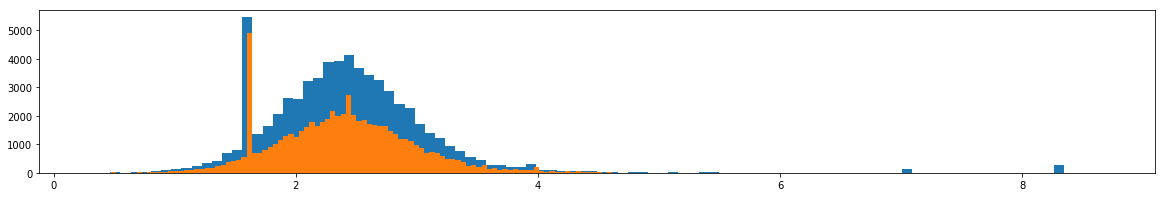

Process Remove Outlier v7 | mean: 2.4235 | std: 0.59087 | min: 0.65089 | max: 4.19611 -> min: 0.65662 | max: 4.19437


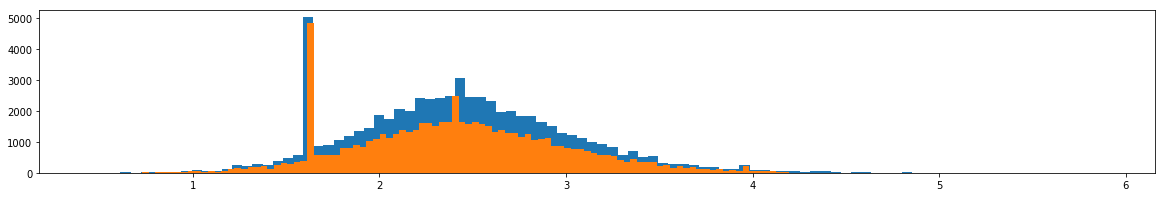

Process Remove Outlier v8 | mean: 1.54041 | std: 2.67179 | min: 1e-05 | max: 9.55578 -> min: 0.00262 | max: 9.31137


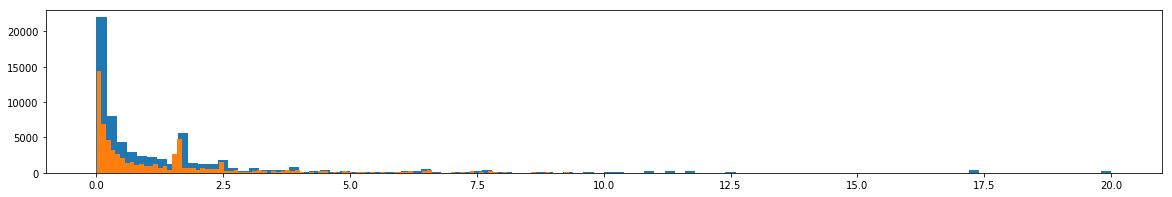

Process Remove Outlier v9 | mean: 8.25819 | std: 2.89009 | min: 1e-05 | max: 16.92846 -> min: 1.23984 | max: 16.91589


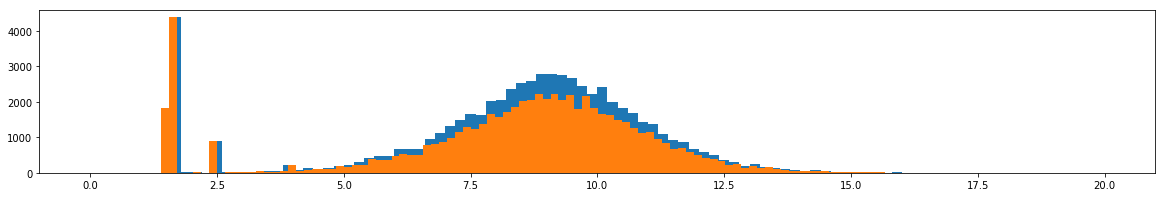

Process Remove Outlier v12 | mean: 6.55329 | std: 1.53918 | min: 1.93575 | max: 11.17083 -> min: 1.97911 | max: 11.16597


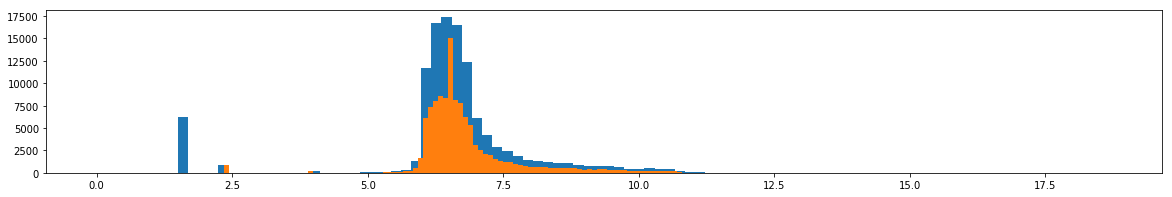

Process Remove Outlier v13 | mean: 4.03077 | std: 1.31562 | min: 0.08391 | max: 7.97763 -> min: 0.78366 | max: 7.95677


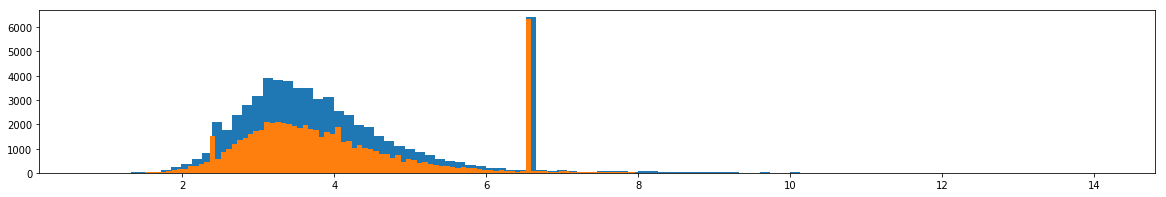

Process Remove Outlier v14 | mean: 11.65929 | std: 2.12882 | min: 5.27283 | max: 18.04575 -> min: 5.42053 | max: 18.03947


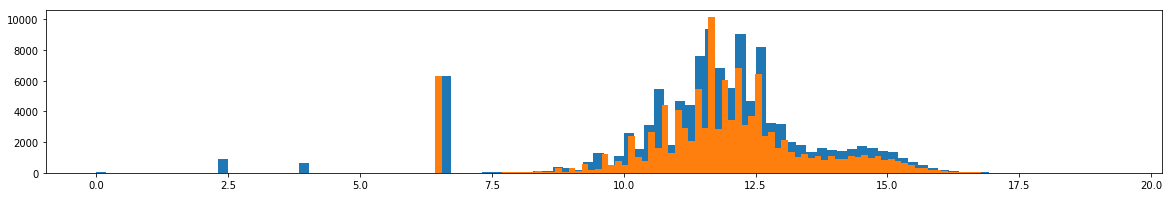

Process Remove Outlier v16 | mean: 5.24975 | std: 1.88326 | min: 1e-05 | max: 10.89954 -> min: 0.21978 | max: 10.86957


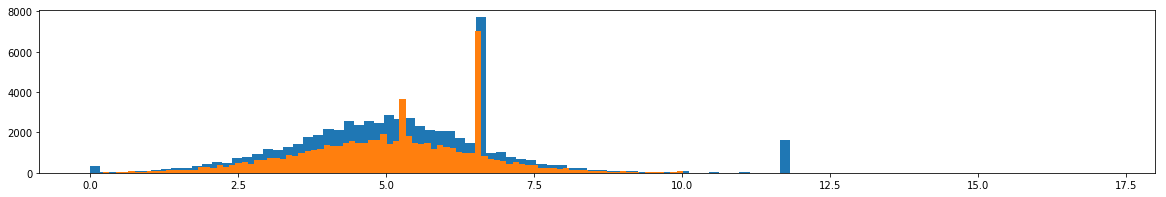

Process Remove Outlier v18 | mean: 1.55758 | std: 1.88472 | min: 1e-05 | max: 7.21173 -> min: 0.02474 | max: 6.92629


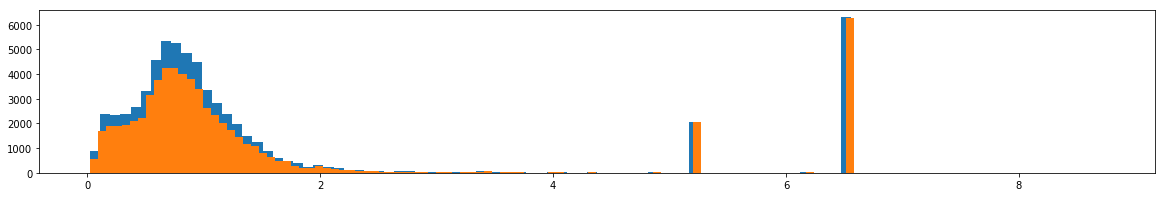

Process Remove Outlier v19 | mean: 0.99387 | std: 2.02892 | min: 1e-05 | max: 7.08062 -> min: 0.0807 | max: 6.55329


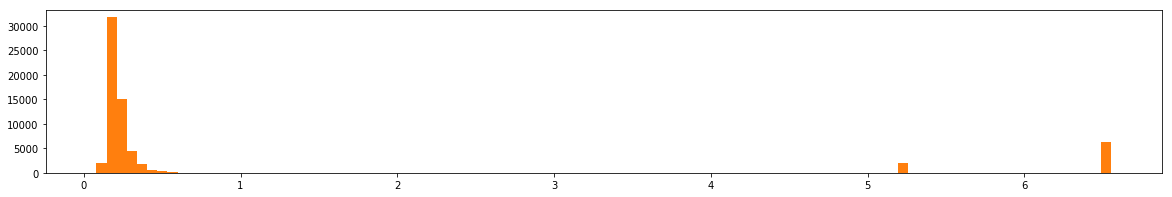

Process Remove Outlier v21 | mean: 6.96423 | std: 1.06536 | min: 3.76815 | max: 10.16031 -> min: 3.76915 | max: 10.15811


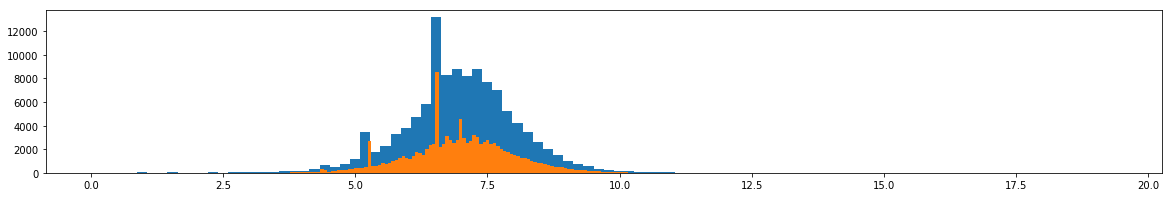

Process Remove Outlier v23 | mean: 1.82081 | std: 4.096 | min: 1e-05 | max: 14.10881 -> min: 1e-05 | max: 14.09504


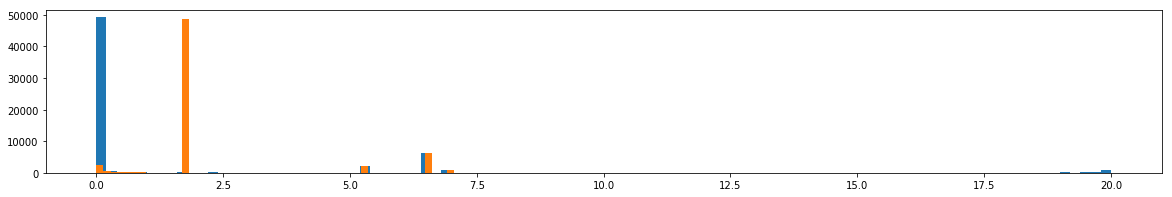

Process Remove Outlier v27 | mean: 2.54047 | std: 1.58587 | min: 1e-05 | max: 7.29809 -> min: 0.44064 | max: 6.96423


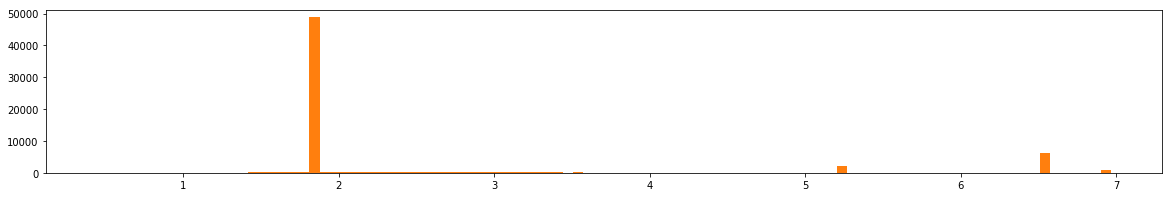

Process Remove Outlier v28 | mean: 2.91662 | std: 2.01018 | min: 1e-05 | max: 8.94716 -> min: 0.30575 | max: 8.93735


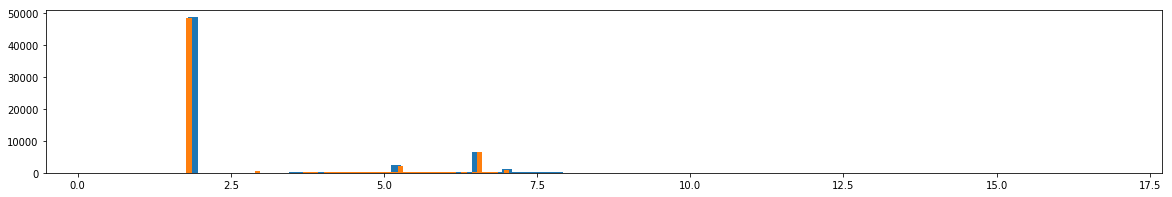

Process Remove Outlier v34 | mean: 4.49561 | std: 2.75292 | min: 1e-05 | max: 12.75437 -> min: 0.7799 | max: 12.48879


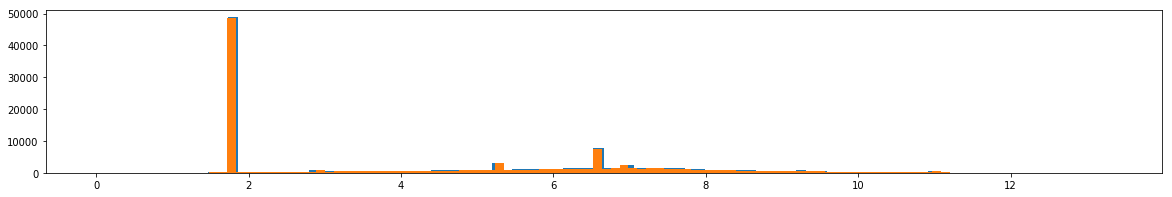

Process Remove Outlier v35 | mean: 3.10127 | std: 2.30124 | min: 1e-05 | max: 10.00499 -> min: 1.82081 | max: 10.00284


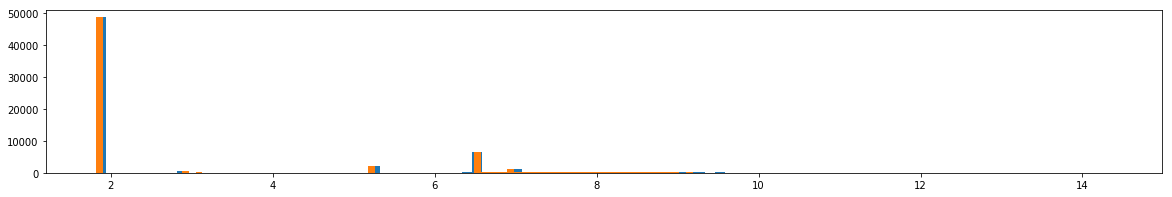

Process Remove Outlier v36 | mean: 4.00877 | std: 4.3585 | min: 1e-05 | max: 17.08427 -> min: 1.82081 | max: 17.00962


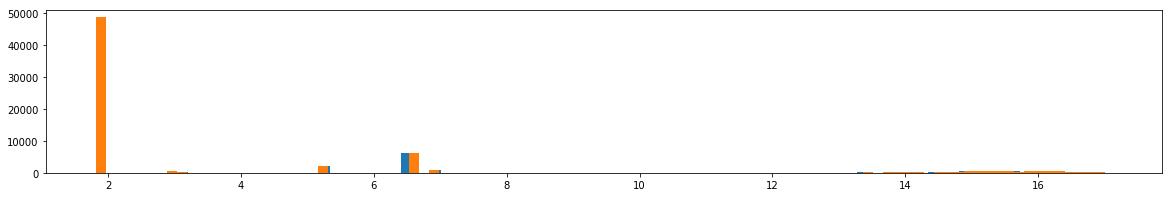

Process Remove Outlier v37 | mean: 2.38159 | std: 1.65336 | min: 1e-05 | max: 7.34166 -> min: 0.04975 | max: 6.96423


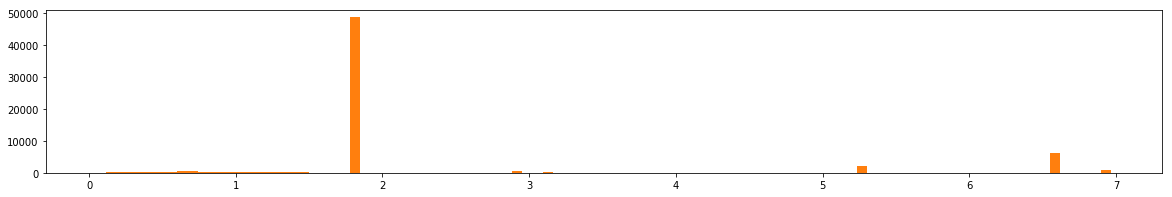

Process Remove Outlier v38 | mean: 1.34972 | std: 1.74947 | min: 1e-05 | max: 6.59813 -> min: 1.0 | max: 6.55329


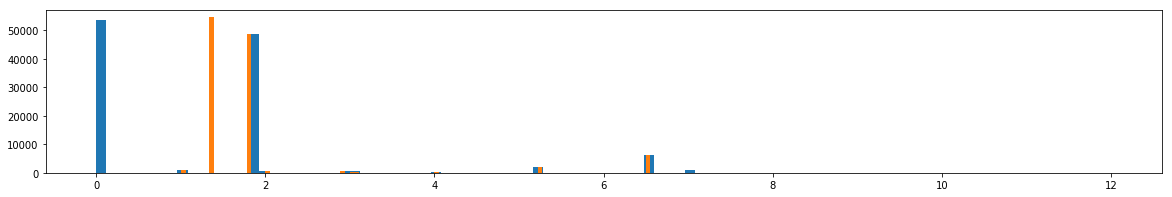

Process Remove Outlier v39 | mean: 1.92814 | std: 1.25655 | min: 1e-05 | max: 5.6978 -> min: 0.01525 | max: 5.24975


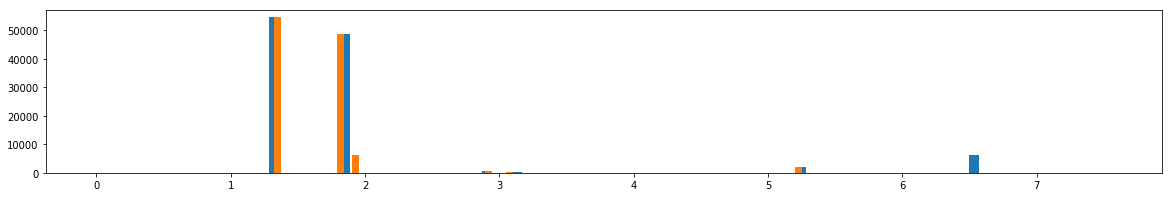

Process Remove Outlier v40 | mean: 1.82104 | std: 1.30288 | min: 1e-05 | max: 5.72968 -> min: 1.34972 | max: 5.6378


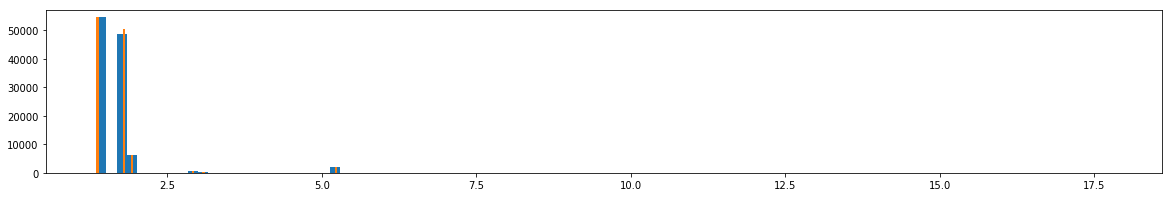

Process Remove Outlier v42 | mean: 1.67368 | std: 0.55718 | min: 0.00214 | max: 3.34522 -> min: 1.34972 | max: 3.10127


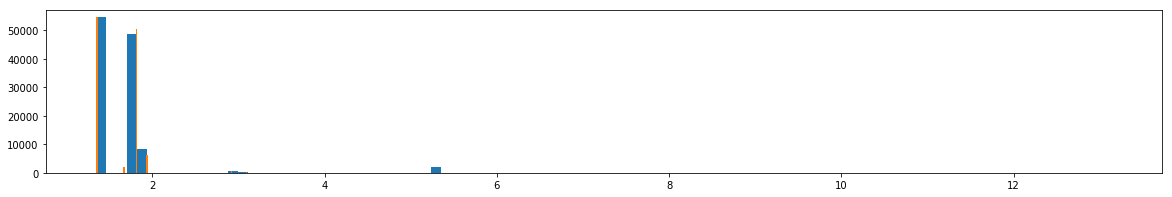

Process Remove Outlier v43 | mean: 1.60874 | std: 0.2699 | min: 0.79905 | max: 2.41843 -> min: 1.34972 | max: 1.92814


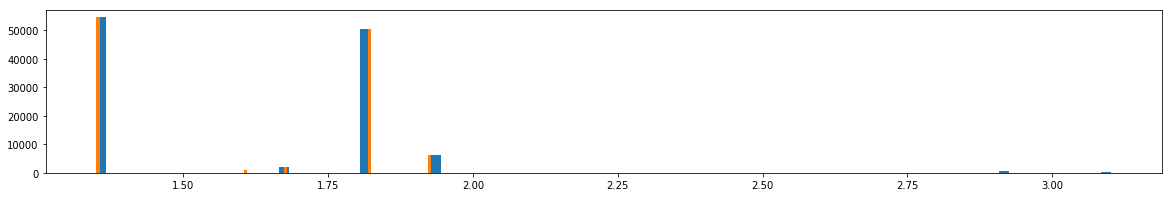

Process Remove Outlier v44 | mean: 1.59774 | std: 0.23968 | min: 0.8787 | max: 2.31678 -> min: 1.34972 | max: 1.92814


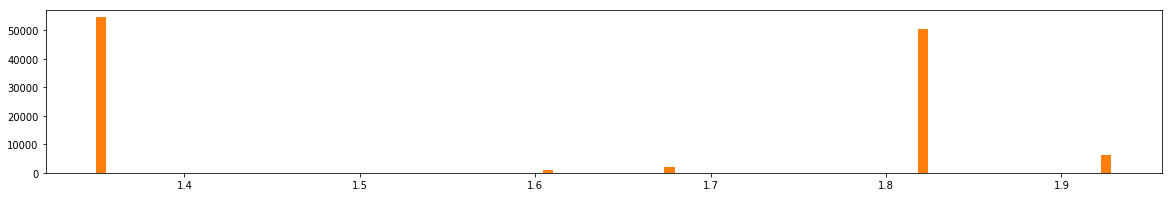

Process Remove Outlier v45 | mean: 1.59774 | std: 0.23968 | min: 0.8787 | max: 2.31678 -> min: 1.34972 | max: 1.92814


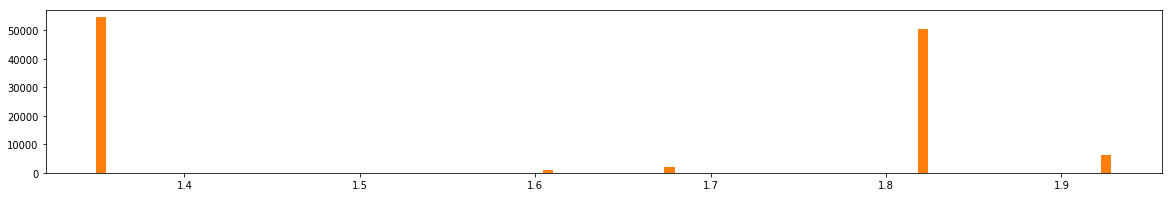

Process Remove Outlier v48 | mean: 1.59774 | std: 0.23968 | min: 0.8787 | max: 2.31678 -> min: 1.34972 | max: 1.92814


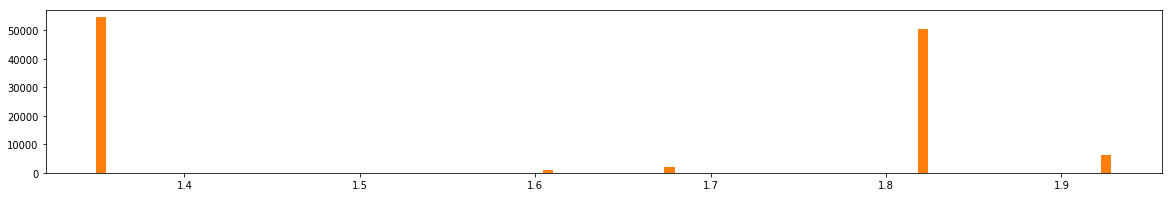

Process Remove Outlier v49 | mean: 1.59774 | std: 0.23968 | min: 0.8787 | max: 2.31678 -> min: 1.34972 | max: 1.92814


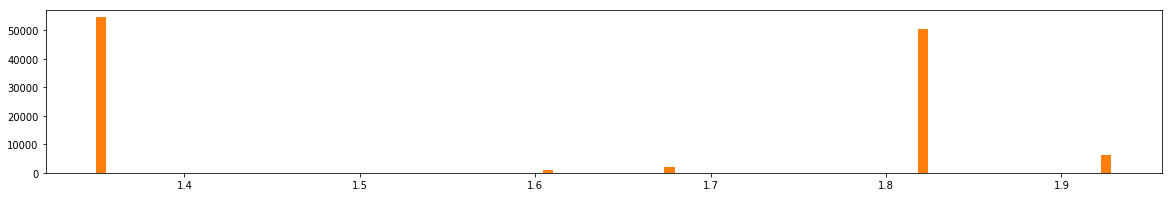

Process Remove Outlier v50 | mean: 1.59769 | std: 0.23986 | min: 0.87811 | max: 2.31727 -> min: 0.88915 | max: 1.92814


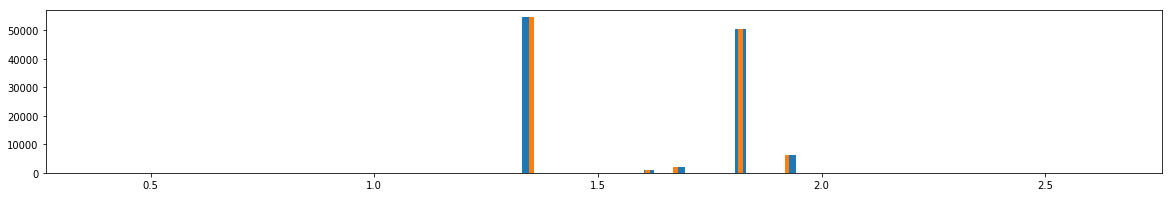

Process Remove Outlier v51 | mean: 1.59774 | std: 0.23967 | min: 0.87872 | max: 2.31676 -> min: 1.34972 | max: 1.92814


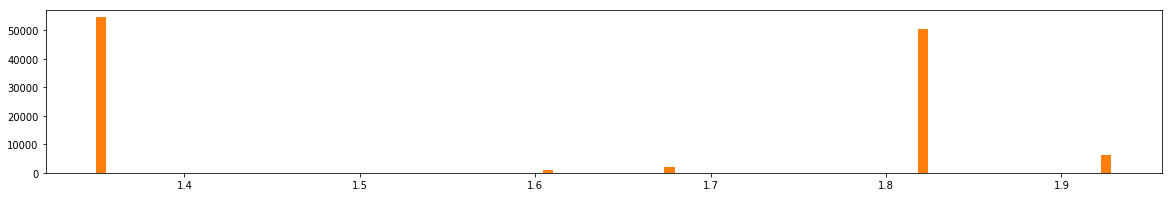

Process Remove Outlier v53 | mean: 1.59774 | std: 0.23967 | min: 0.87872 | max: 2.31676 -> min: 1.34972 | max: 1.92814


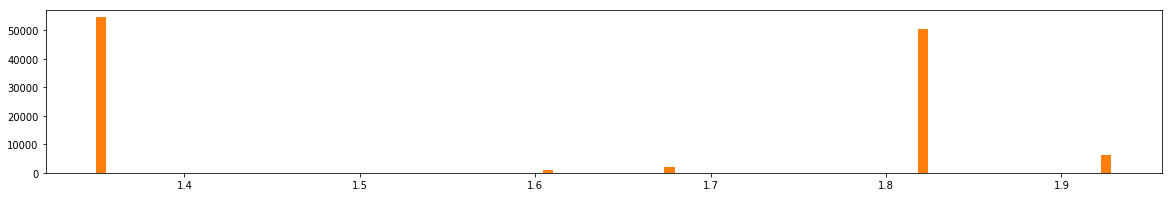

Process Remove Outlier v57 | mean: 1.59774 | std: 0.23967 | min: 0.87872 | max: 2.31676 -> min: 1.34972 | max: 1.92814


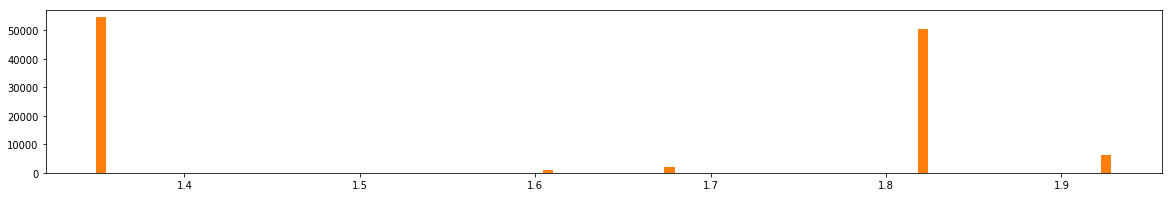

Process Remove Outlier v58 | mean: 1.59774 | std: 0.23967 | min: 0.87872 | max: 2.31676 -> min: 1.34972 | max: 1.92814


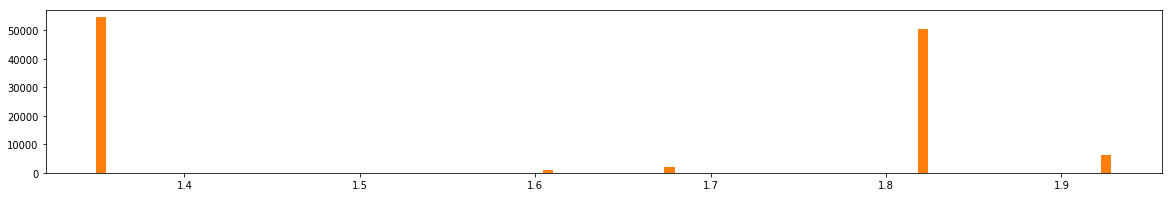

Process Remove Outlier v59 | mean: 1.59774 | std: 0.23967 | min: 0.87872 | max: 2.31676 -> min: 1.34972 | max: 1.92814


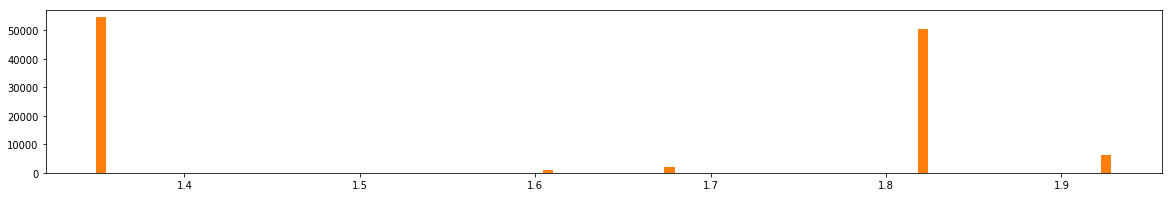

Process Remove Outlier v60 | mean: 1.59774 | std: 0.23967 | min: 0.87872 | max: 2.31676 -> min: 1.34972 | max: 1.92814


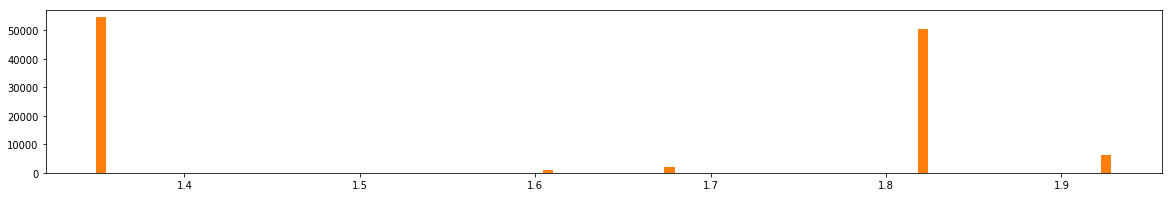

Process Remove Outlier v61 | mean: 1.59774 | std: 0.23967 | min: 0.87872 | max: 2.31676 -> min: 1.34972 | max: 1.92814


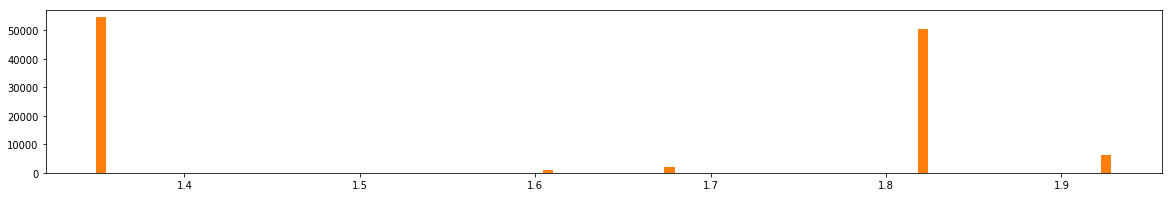

Process Remove Outlier v62 | mean: 1.59766 | std: 0.23995 | min: 0.87782 | max: 2.3175 -> min: 1.34972 | max: 1.92814


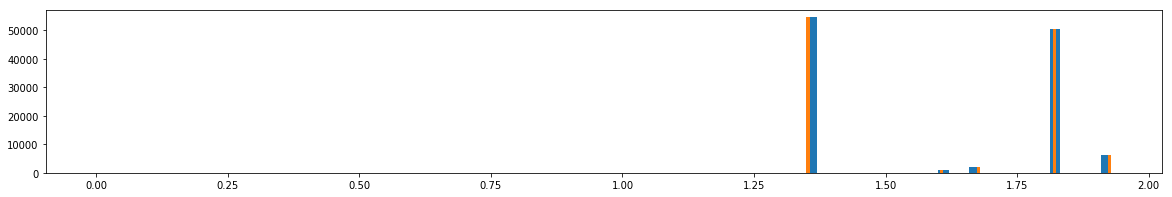

Process Remove Outlier v65 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


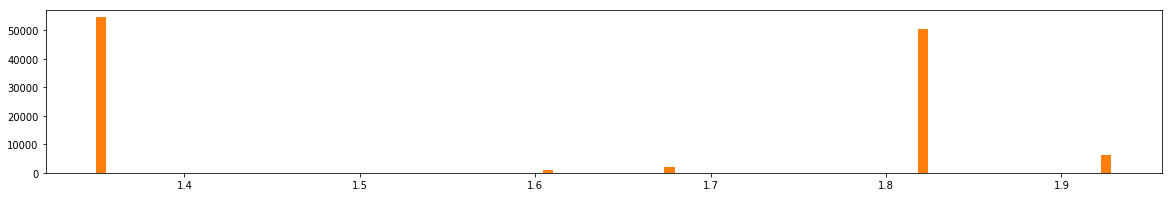

Process Remove Outlier v68 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


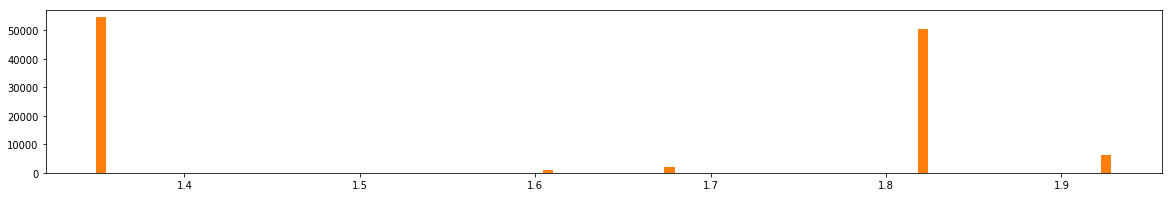

Process Remove Outlier v69 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


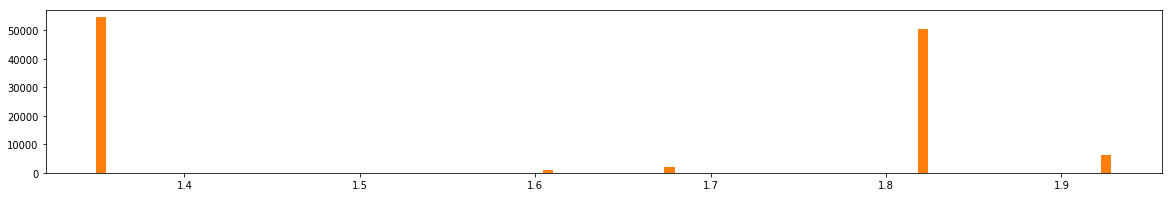

Process Remove Outlier v70 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


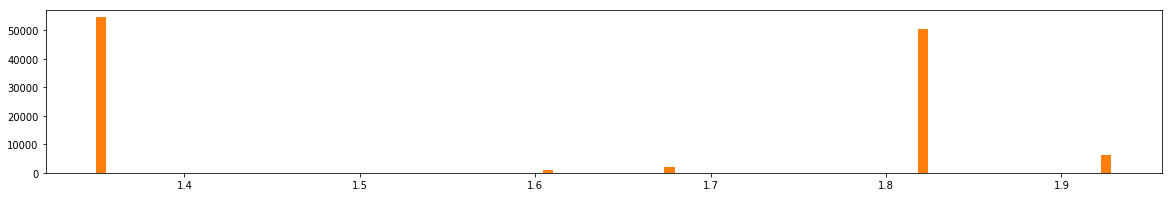

Process Remove Outlier v72 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


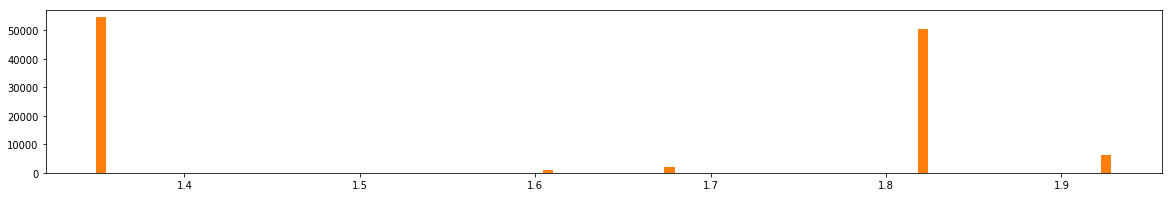

Process Remove Outlier v73 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


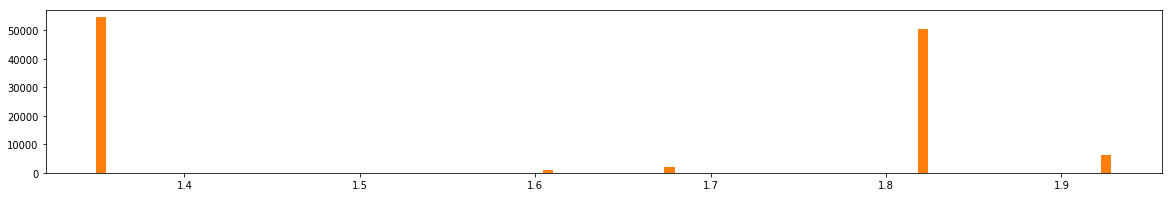

Process Remove Outlier v76 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


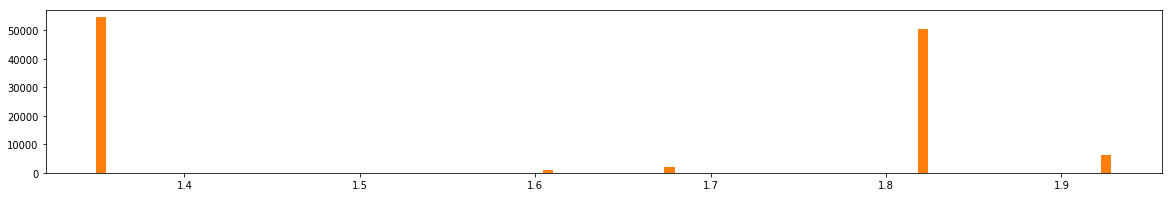

Process Remove Outlier v77 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


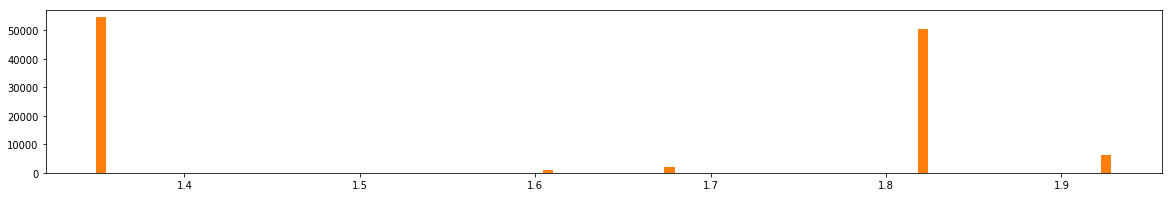

Process Remove Outlier v78 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


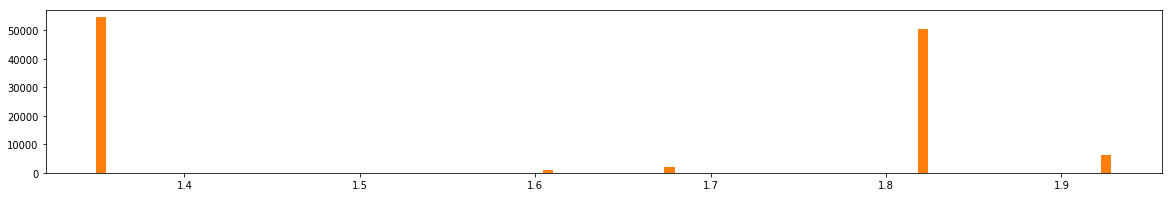

Process Remove Outlier v80 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


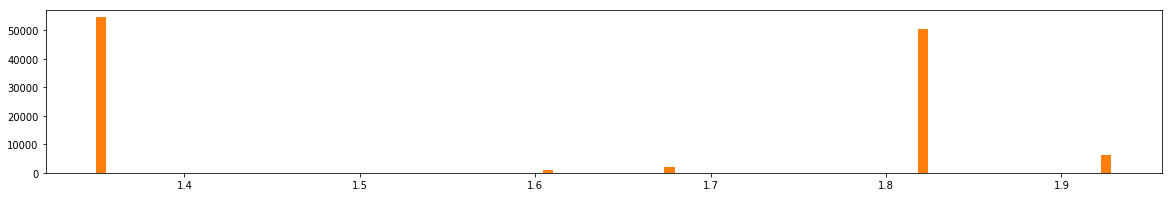

Process Remove Outlier v81 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


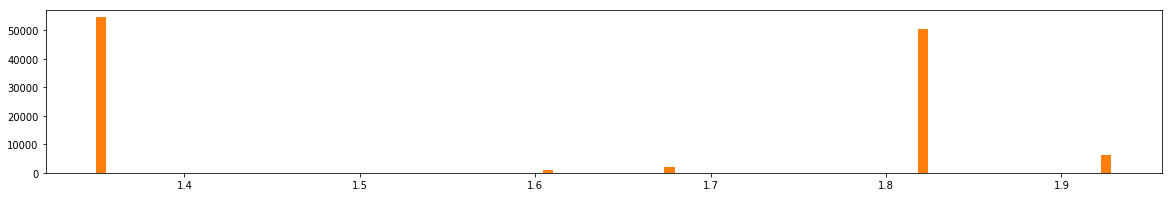

Process Remove Outlier v82 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


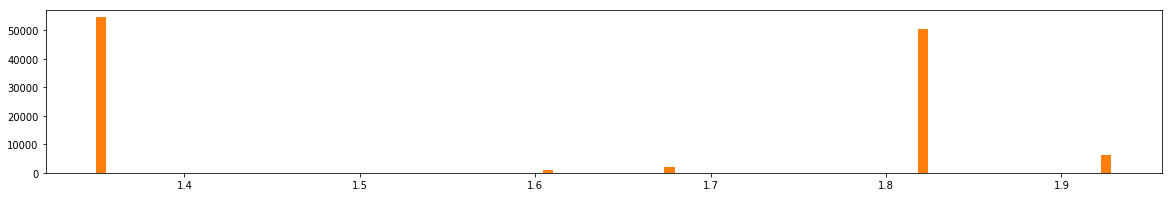

Process Remove Outlier v83 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


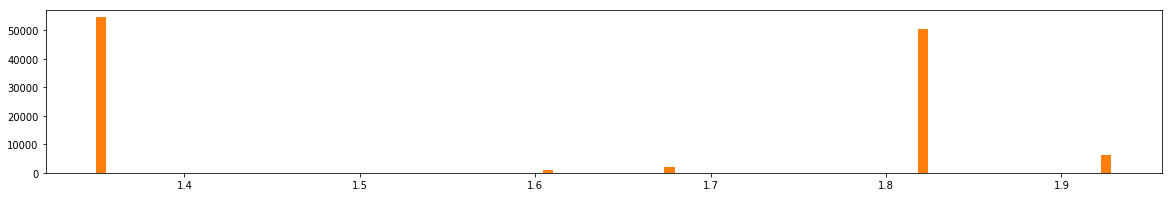

Process Remove Outlier v84 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


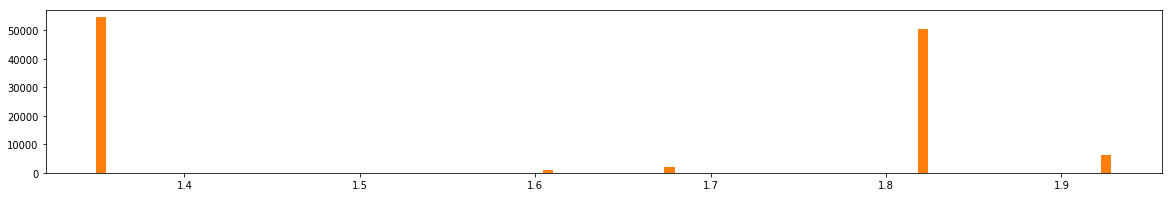

Process Remove Outlier v85 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


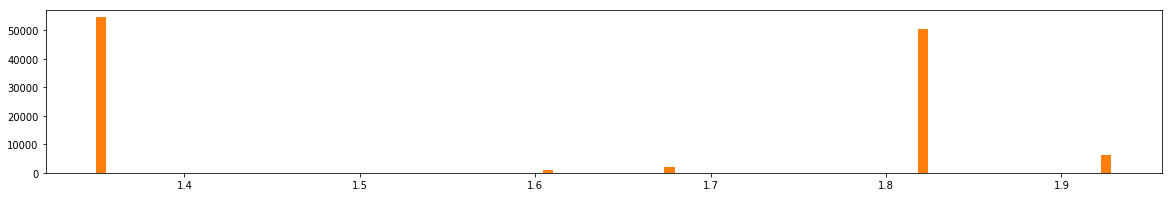

Process Remove Outlier v86 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


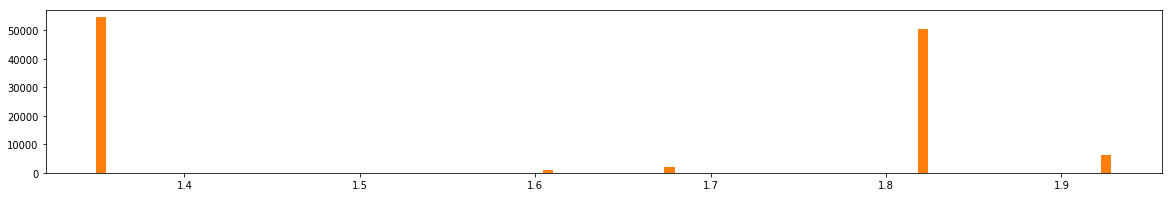

Process Remove Outlier v87 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


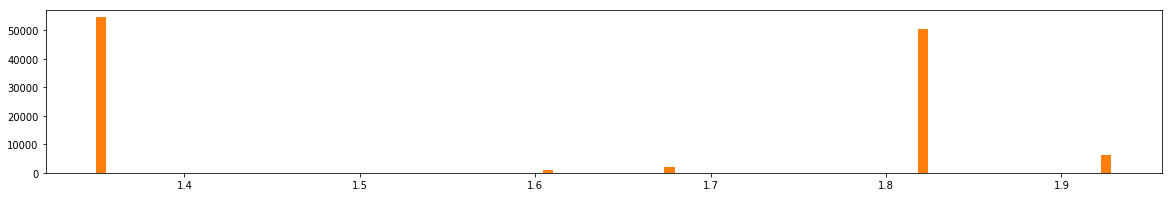

Process Remove Outlier v88 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


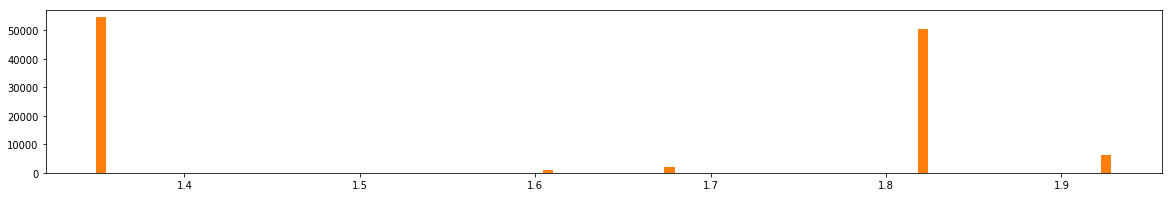

Process Remove Outlier v89 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


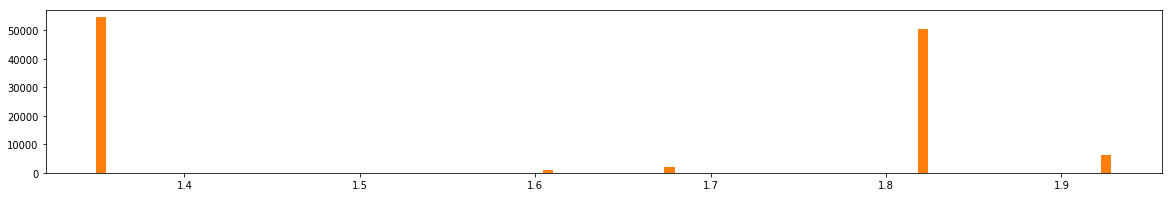

Process Remove Outlier v90 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


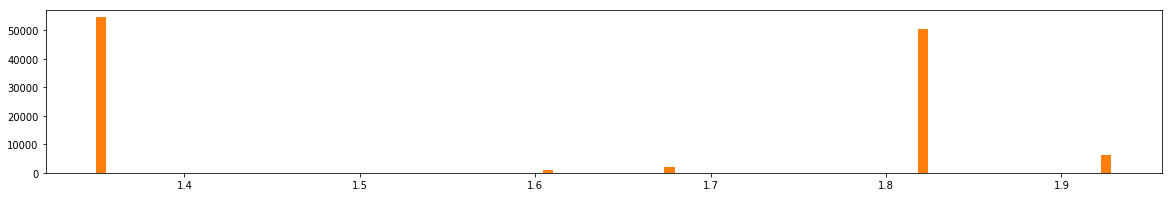

Process Remove Outlier v93 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


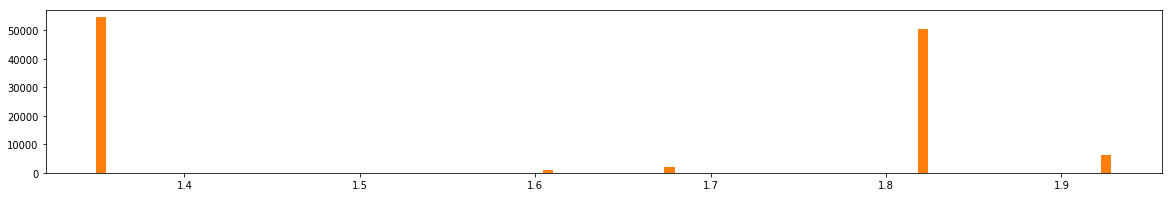

Process Remove Outlier v94 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


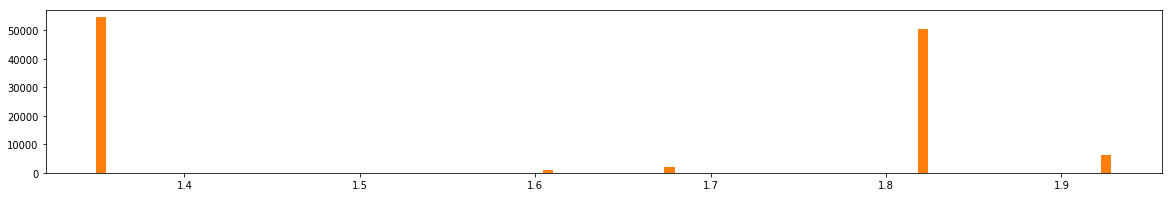

Process Remove Outlier v95 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


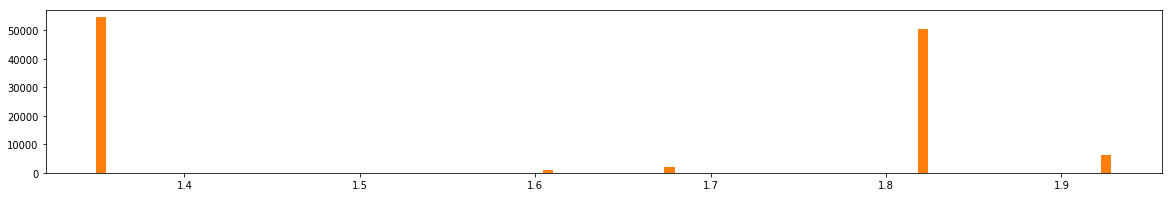

Process Remove Outlier v96 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


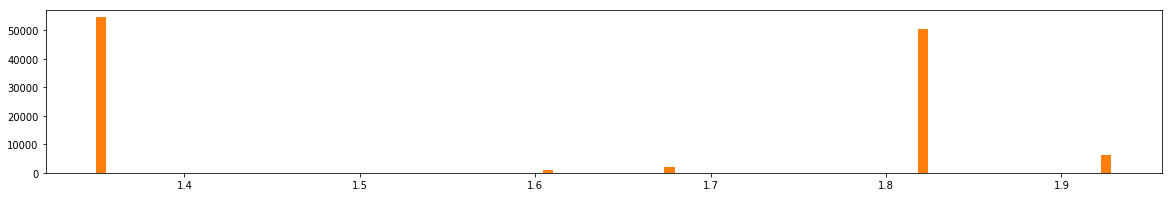

Process Remove Outlier v97 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


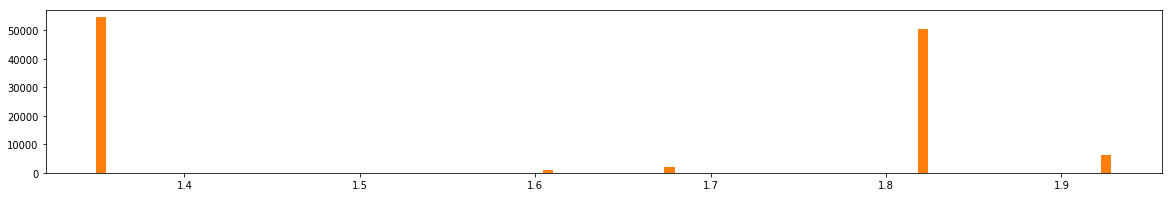

Process Remove Outlier v98 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


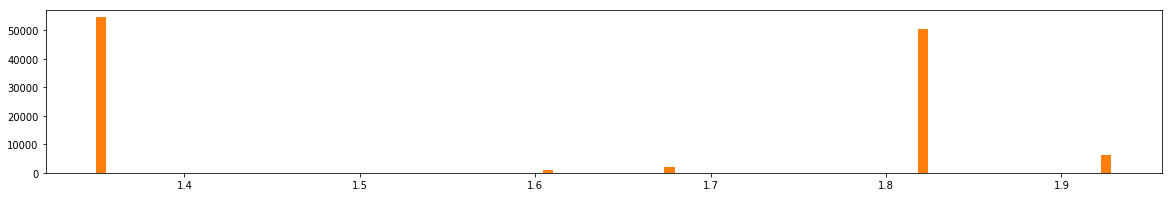

Process Remove Outlier v99 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


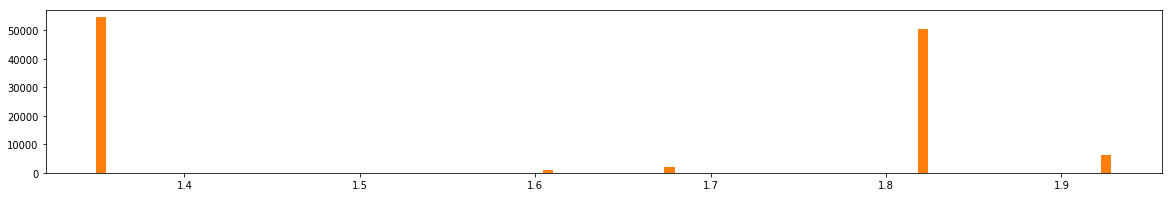

Process Remove Outlier v100 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


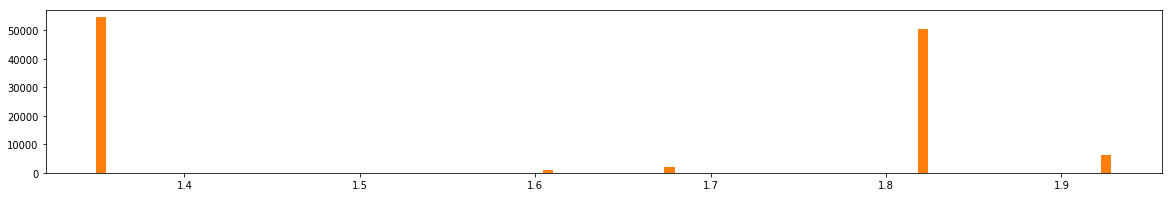

Process Remove Outlier v101 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


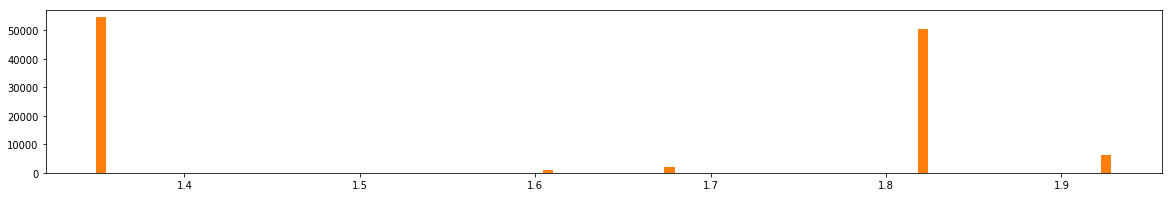

Process Remove Outlier v102 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


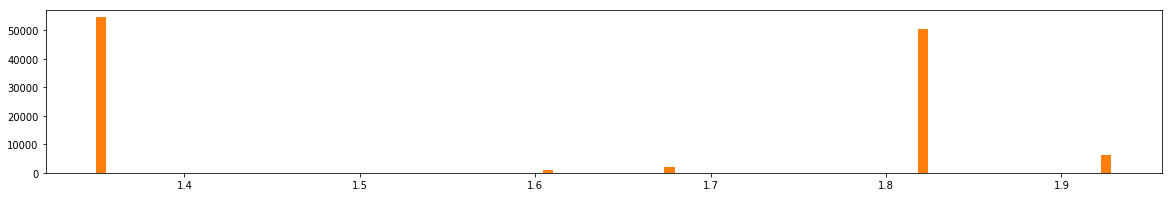

Process Remove Outlier v103 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


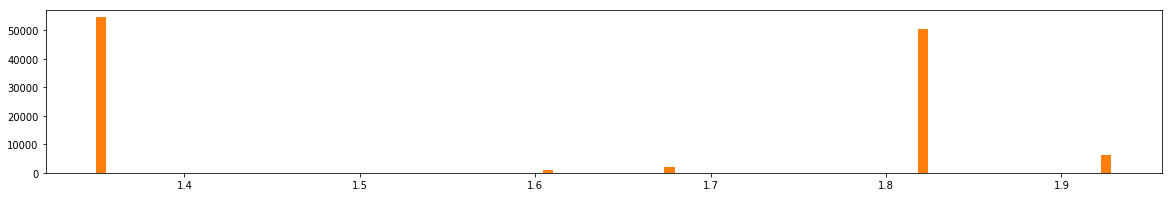

Process Remove Outlier v106 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


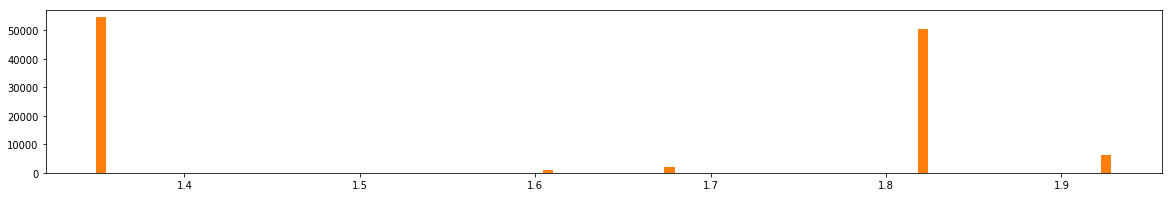

Process Remove Outlier v108 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


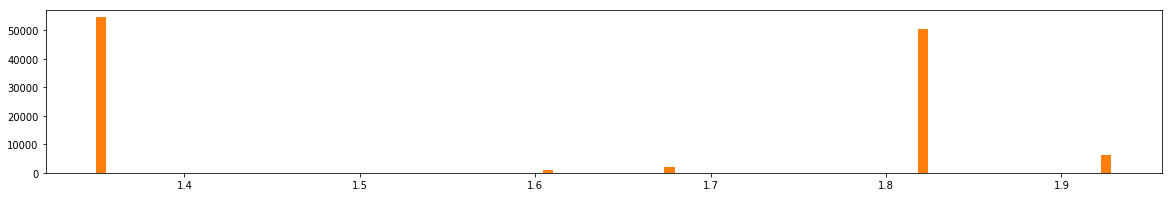

Process Remove Outlier v111 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


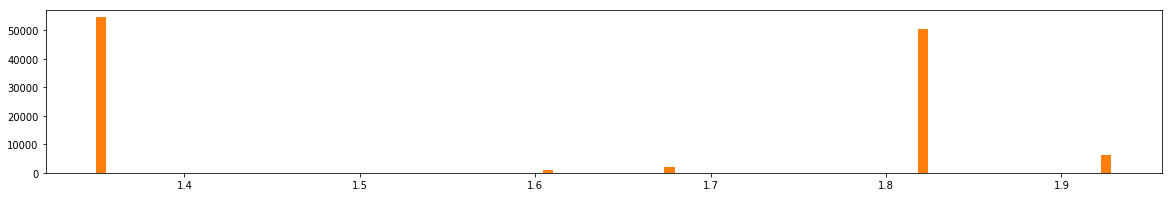

Process Remove Outlier v115 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


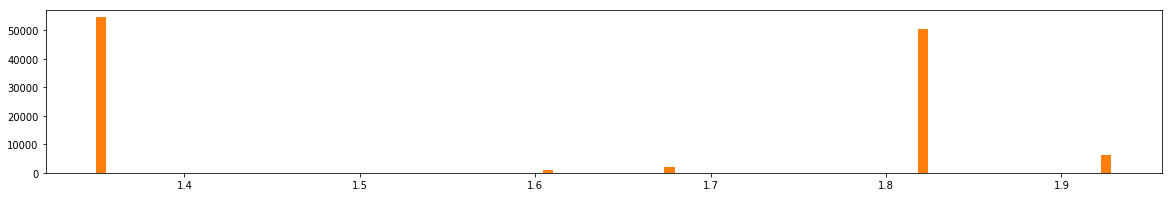

Process Remove Outlier v116 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


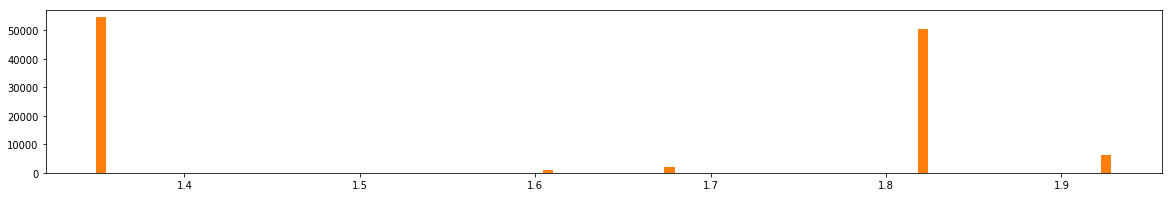

Process Remove Outlier v117 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


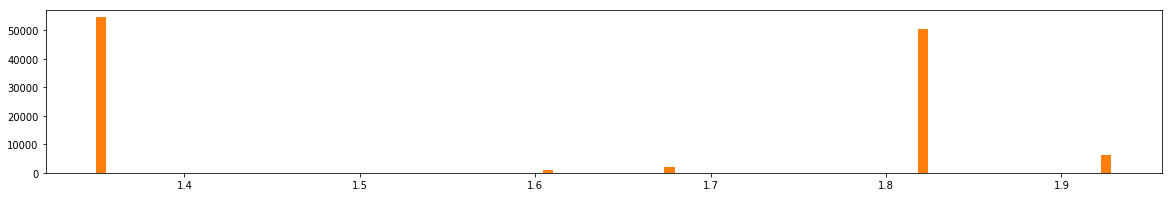

Process Remove Outlier v119 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


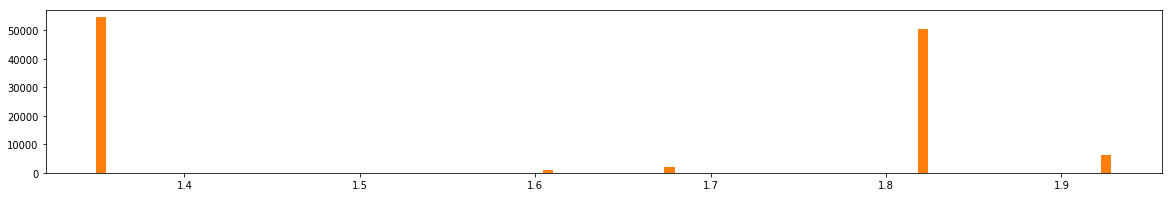

Process Remove Outlier v120 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


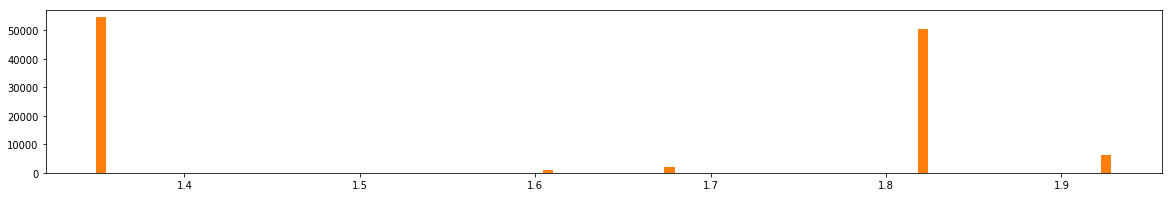

Process Remove Outlier v122 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


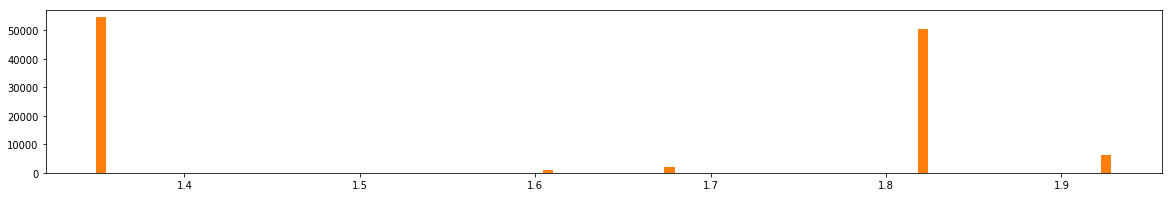

Process Remove Outlier v123 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


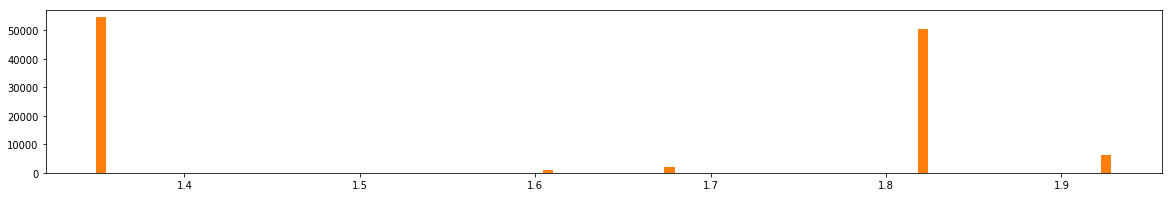

Process Remove Outlier v124 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


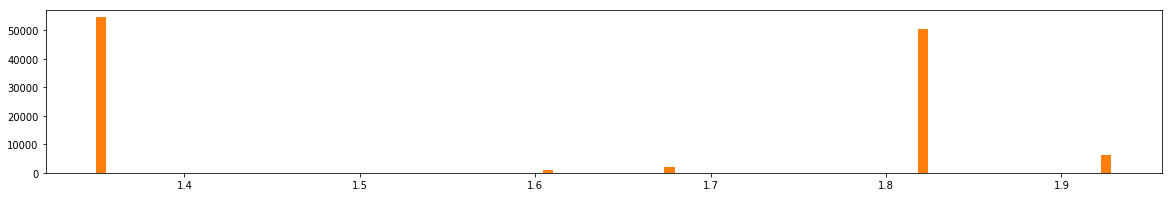

Process Remove Outlier v126 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


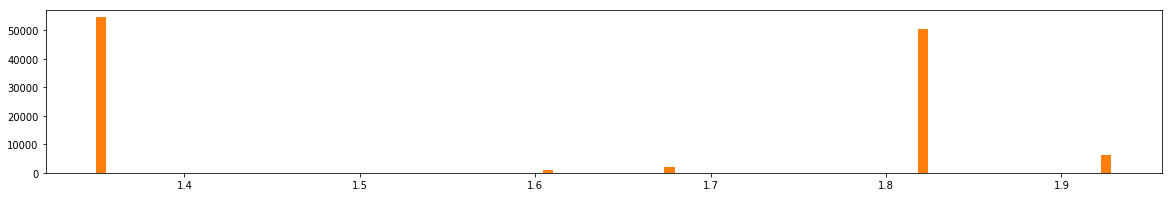

Process Remove Outlier v127 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


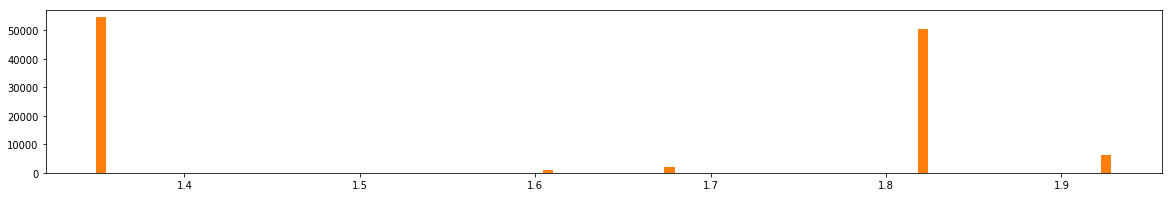

Process Remove Outlier v128 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


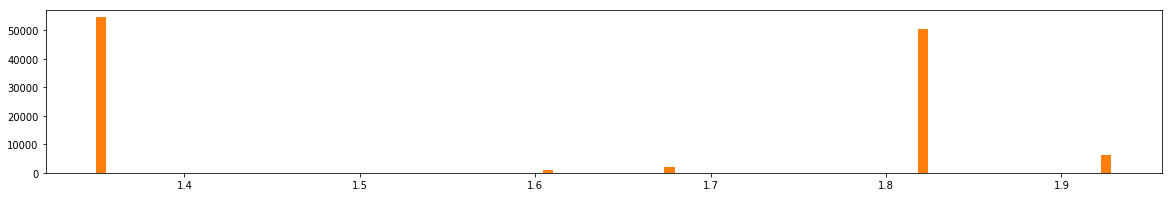

Process Remove Outlier v129 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


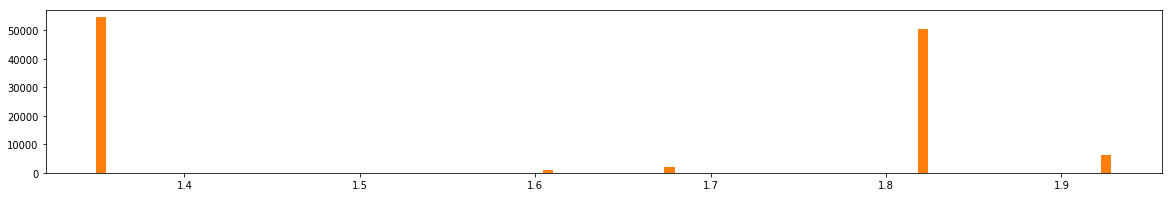

Process Remove Outlier v130 | mean: 1.59774 | std: 0.23967 | min: 0.87874 | max: 2.31674 -> min: 1.34972 | max: 1.92814


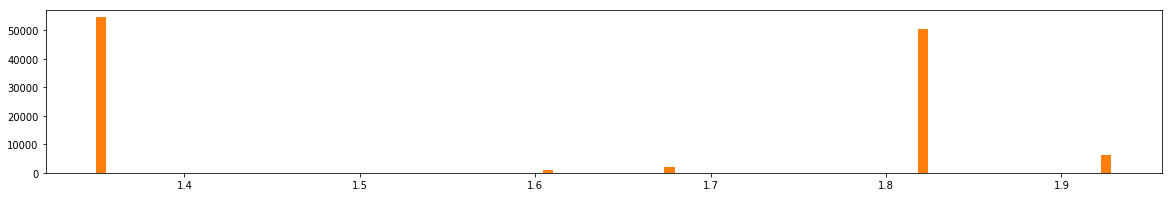

In [22]:
for col in train.columns[2:132]:
    remove_outlier(train, col)

Process Remove Outlier v1 | mean: 1.62862 | std: 1.07287 | min: 1e-05 | max: 4.84722 -> min: 0.0902 | max: 4.84716


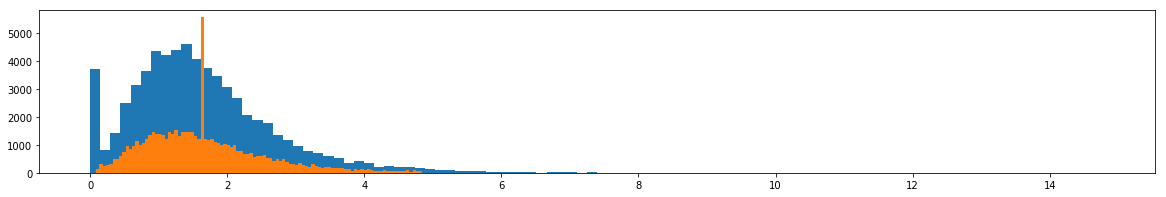

Process Remove Outlier v2 | mean: 6.98773 | std: 3.15049 | min: 1e-05 | max: 16.43919 -> min: 0.73389 | max: 16.42367


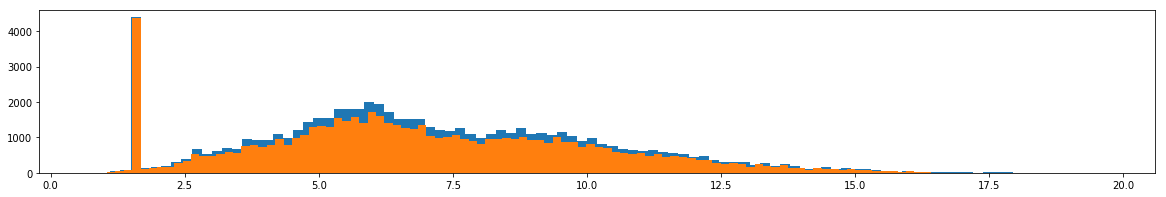

Process Remove Outlier v4 | mean: 3.96086 | std: 1.26784 | min: 0.15733 | max: 7.76439 -> min: 0.20227 | max: 7.76415


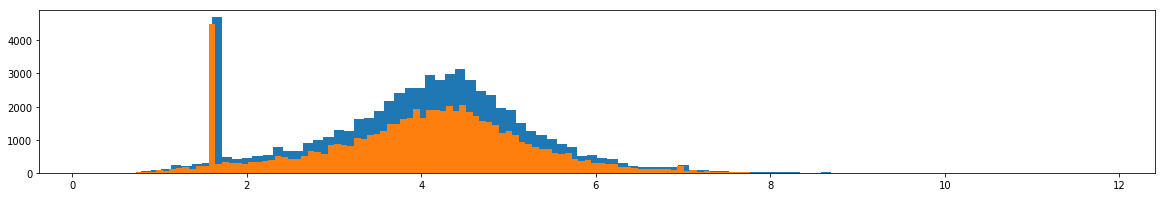

Process Remove Outlier v5 | mean: 8.31317 | std: 2.67038 | min: 0.30203 | max: 16.32431 -> min: 0.42367 | max: 16.32145


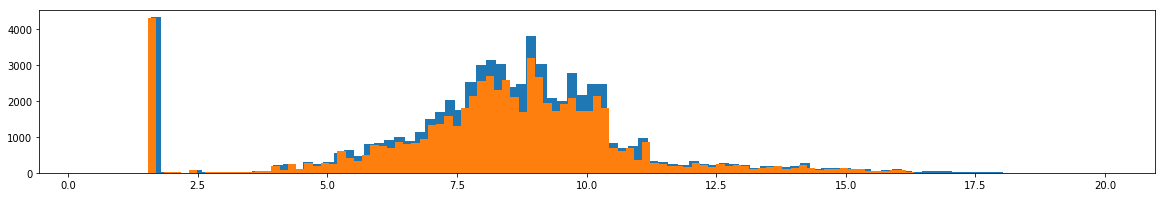

Process Remove Outlier v6 | mean: 2.42292 | std: 0.73787 | min: 0.20931 | max: 4.63653 -> min: 0.30075 | max: 4.63107


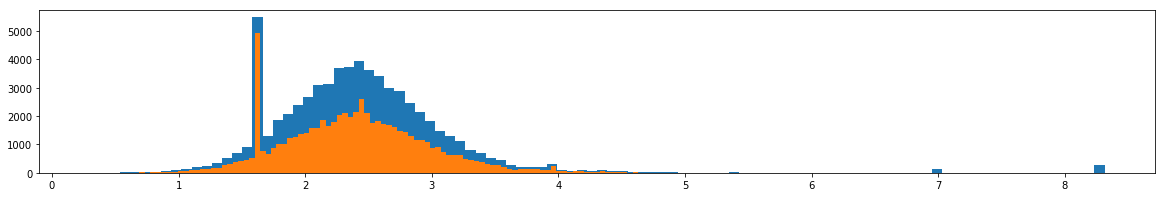

Process Remove Outlier v7 | mean: 2.42233 | std: 0.5934 | min: 0.64212 | max: 4.20254 -> min: 0.64993 | max: 4.20022


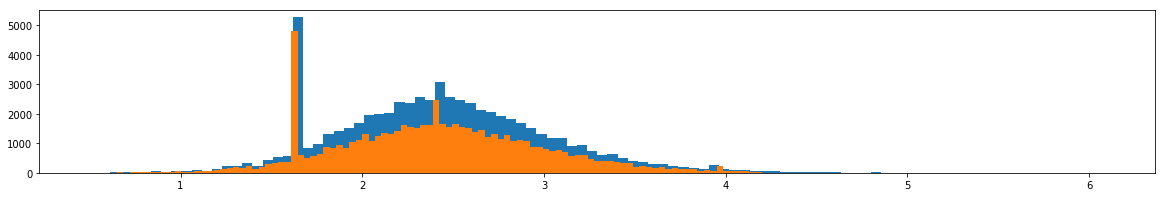

Process Remove Outlier v8 | mean: 1.56411 | std: 2.70704 | min: 1e-05 | max: 9.68523 -> min: 0.00316 | max: 9.64563


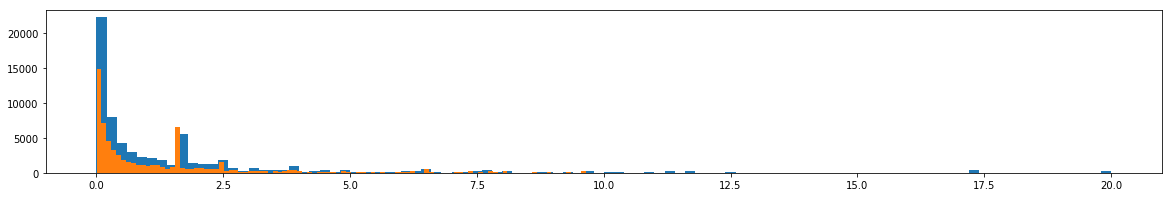

Process Remove Outlier v9 | mean: 8.28649 | std: 2.85746 | min: 1e-05 | max: 16.85888 -> min: 1.23984 | max: 16.8421


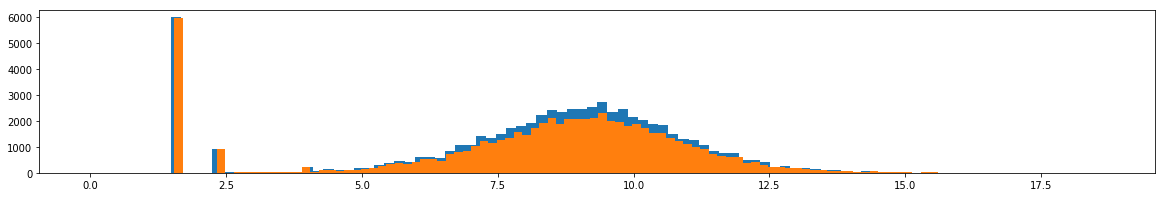

Process Remove Outlier v12 | mean: 6.56095 | std: 1.52078 | min: 1.99861 | max: 11.12329 -> min: 2.00143 | max: 11.12127


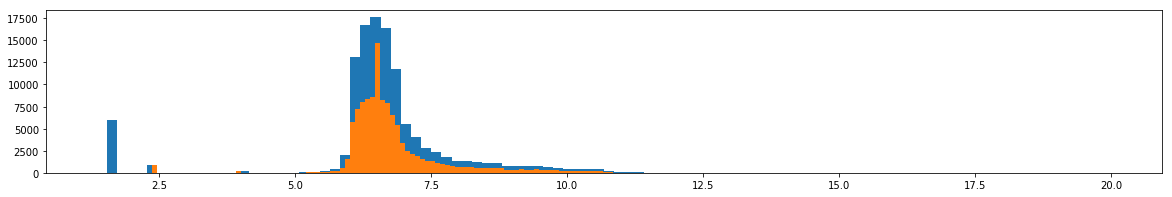

Process Remove Outlier v13 | mean: 4.03856 | std: 1.33563 | min: 0.03167 | max: 8.04545 -> min: 0.78366 | max: 8.03991


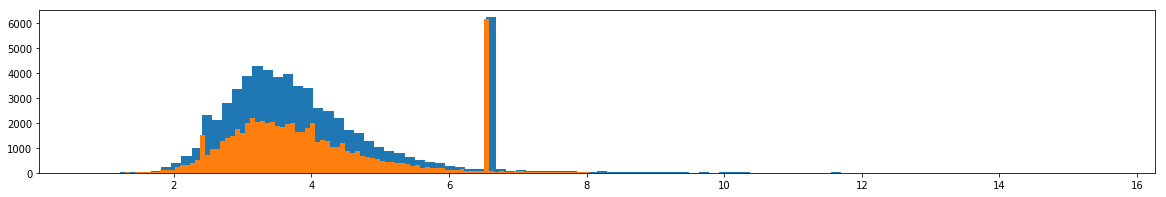

Process Remove Outlier v14 | mean: 11.67091 | std: 2.12201 | min: 5.30488 | max: 18.03694 -> min: 6.11841 | max: 17.92382


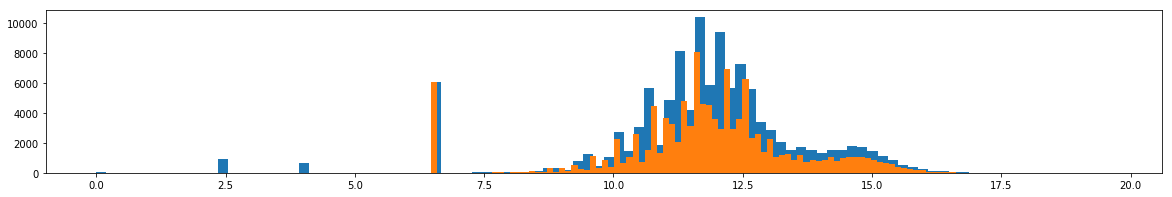

Process Remove Outlier v16 | mean: 5.24727 | std: 1.89111 | min: 1e-05 | max: 10.92061 -> min: 0.21978 | max: 10.90909


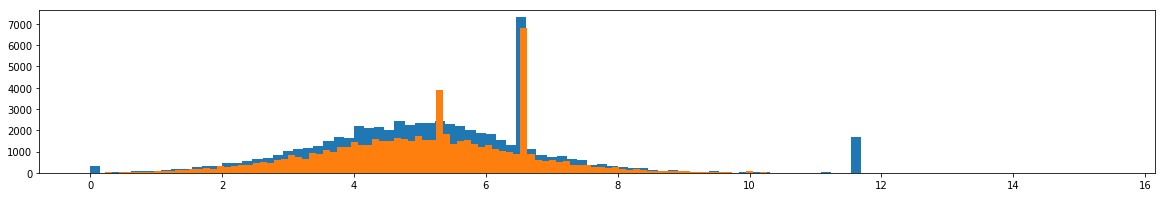

Process Remove Outlier v18 | mean: 1.53933 | std: 1.86222 | min: 1e-05 | max: 7.12598 -> min: 0.02686 | max: 6.92628


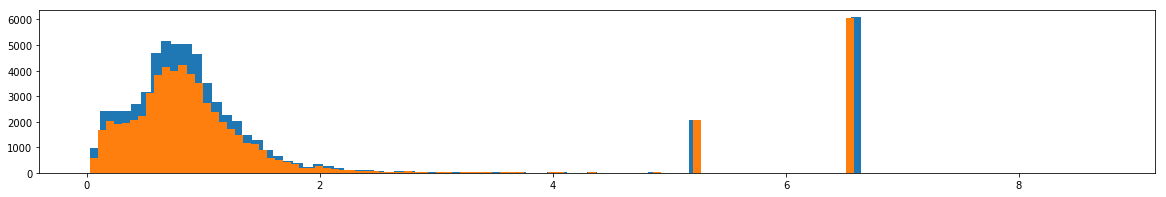

Process Remove Outlier v19 | mean: 0.97324 | std: 2.00493 | min: 1e-05 | max: 6.98803 -> min: 0.08703 | max: 6.56095


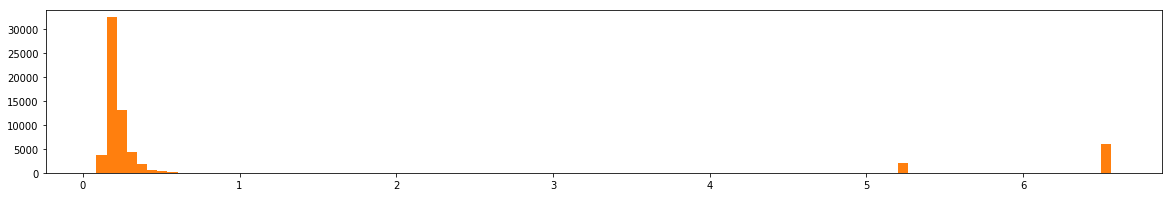

Process Remove Outlier v21 | mean: 6.97451 | std: 1.05428 | min: 3.81166 | max: 10.13736 -> min: 3.81253 | max: 10.13574


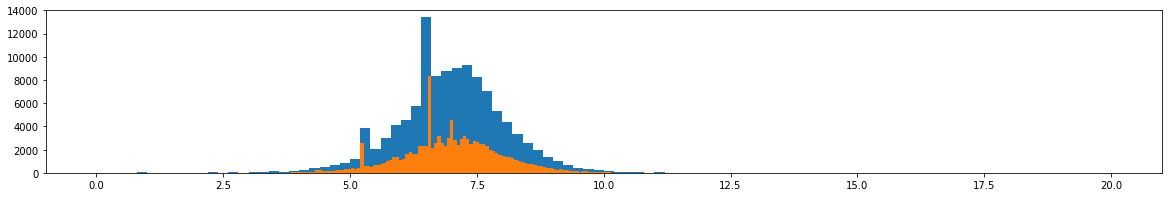

Process Remove Outlier v23 | mean: 1.81725 | std: 4.11446 | min: 1e-05 | max: 14.16063 -> min: 2e-05 | max: 14.15066


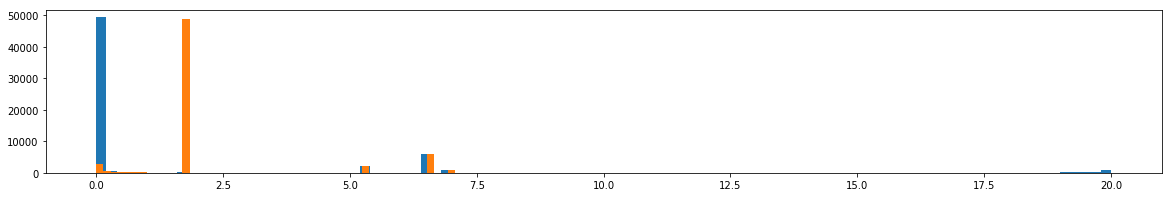

Process Remove Outlier v27 | mean: 2.51969 | std: 1.56918 | min: 1e-05 | max: 7.22723 -> min: 0.44064 | max: 6.97451


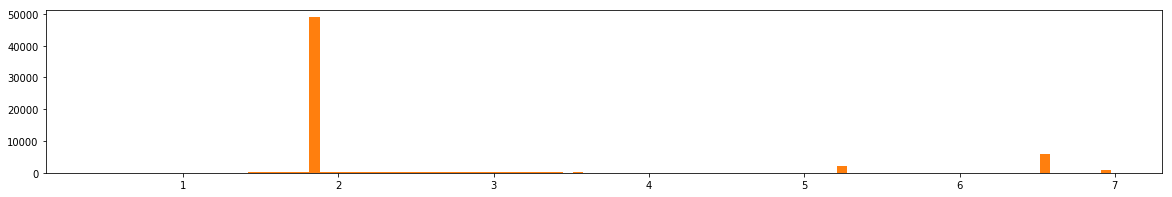

Process Remove Outlier v28 | mean: 2.90219 | std: 1.99863 | min: 1e-05 | max: 8.89808 -> min: 0.23305 | max: 8.89245


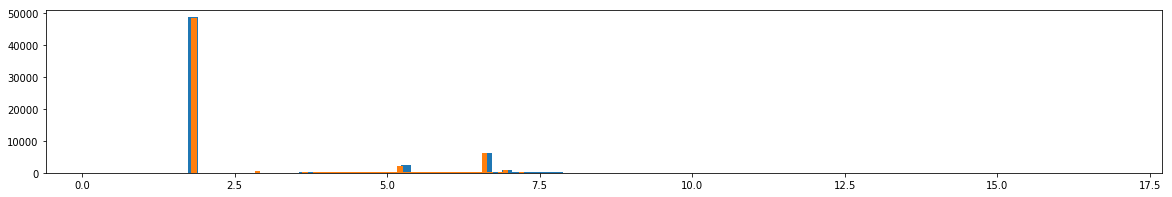

Process Remove Outlier v34 | mean: 4.48972 | std: 2.75839 | min: 1e-05 | max: 12.76488 -> min: 0.78868 | max: 12.68989


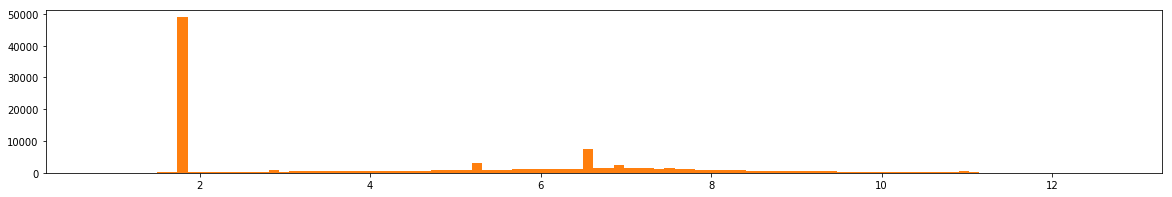

Process Remove Outlier v35 | mean: 3.08947 | std: 2.2988 | min: 1e-05 | max: 9.98586 -> min: 1.81725 | max: 9.98225


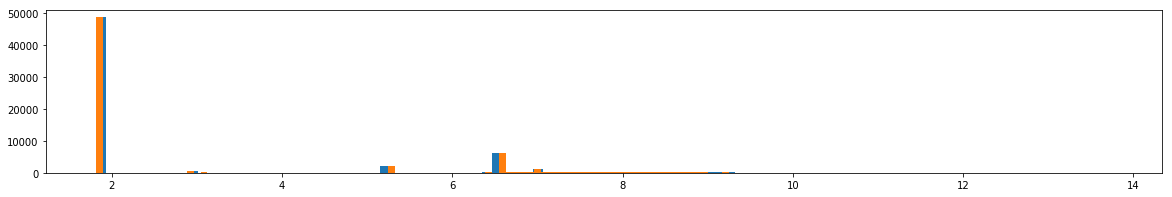

Process Remove Outlier v36 | mean: 4.02293 | std: 4.39734 | min: 1e-05 | max: 17.21494 -> min: 1.81725 | max: 17.11092


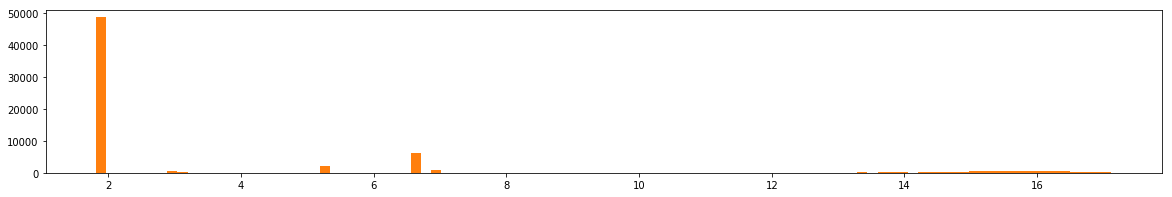

Process Remove Outlier v37 | mean: 2.36022 | std: 1.63563 | min: 1e-05 | max: 7.2671 -> min: 0.04292 | max: 6.97451


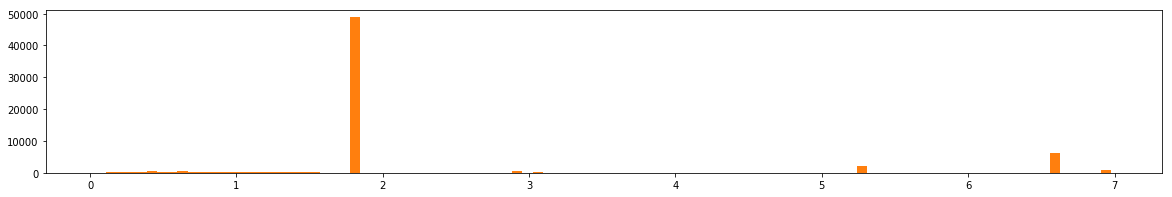

Process Remove Outlier v38 | mean: 1.33183 | std: 1.72977 | min: 1e-05 | max: 6.52115 -> min: 1.0 | max: 6.0


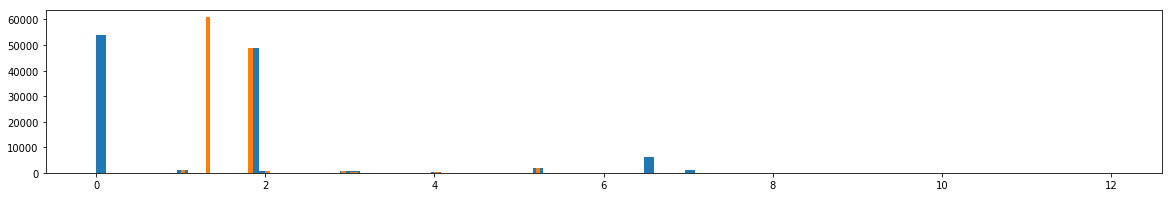

Process Remove Outlier v39 | mean: 1.62569 | std: 0.56571 | min: 1e-05 | max: 3.32281 -> min: 0.01525 | max: 3.08947


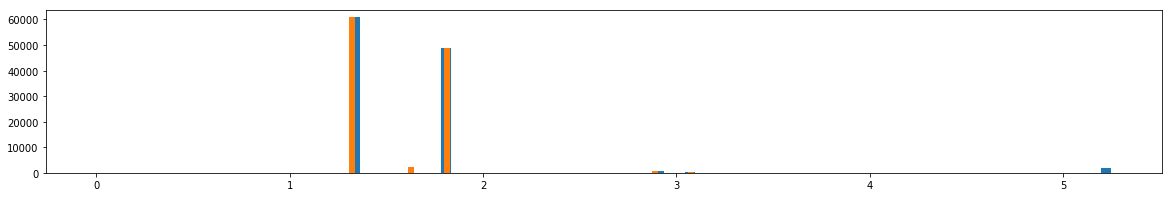

Process Remove Outlier v40 | mean: 1.70818 | std: 1.19647 | min: 1e-05 | max: 5.29759 -> min: 1.33183 | max: 5.26156


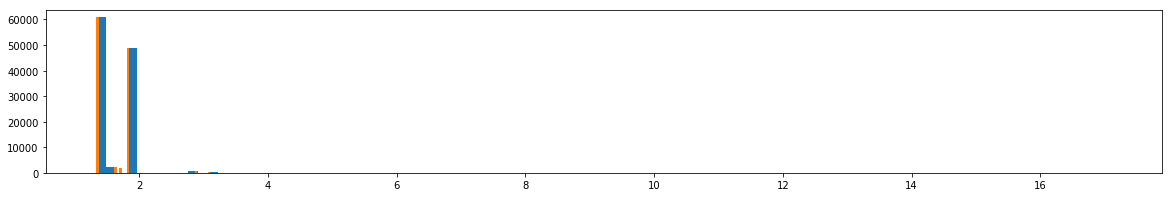

Process Remove Outlier v42 | mean: 1.56333 | std: 0.2711 | min: 0.75003 | max: 2.37663 -> min: 1.33183 | max: 1.81725


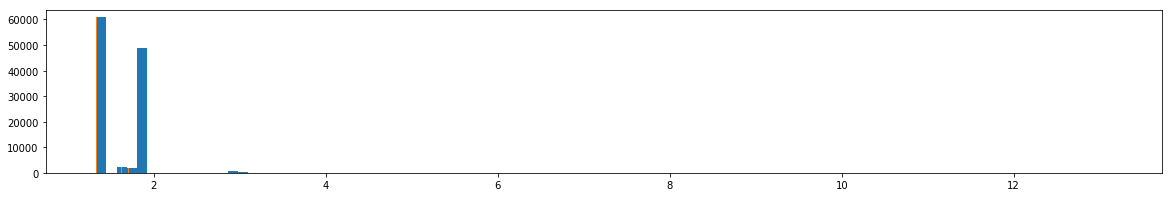

Process Remove Outlier v43 | mean: 1.55197 | std: 0.23711 | min: 0.84065 | max: 2.26329 -> min: 1.33183 | max: 1.81725


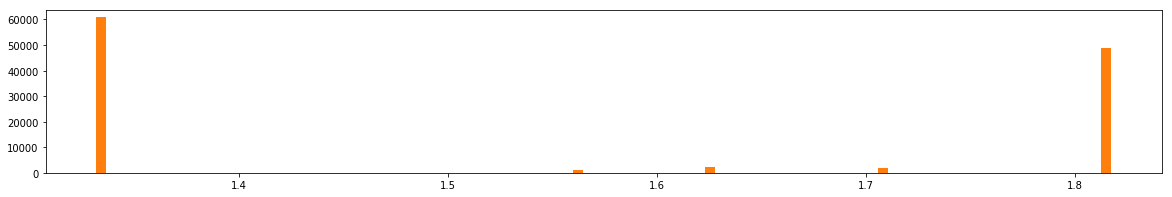

Process Remove Outlier v44 | mean: 1.55197 | std: 0.23711 | min: 0.84065 | max: 2.26329 -> min: 1.33183 | max: 1.81725


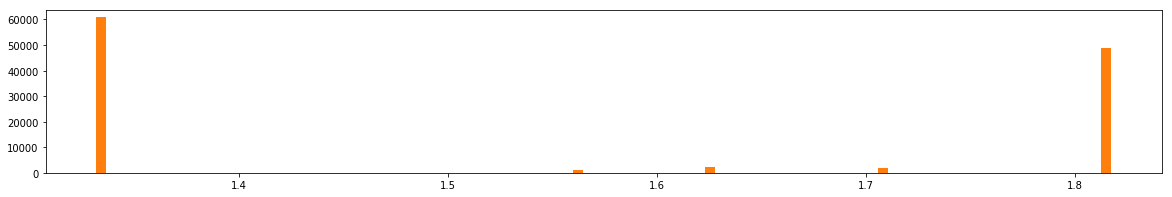

Process Remove Outlier v45 | mean: 1.55197 | std: 0.23711 | min: 0.84065 | max: 2.26329 -> min: 1.33183 | max: 1.81725


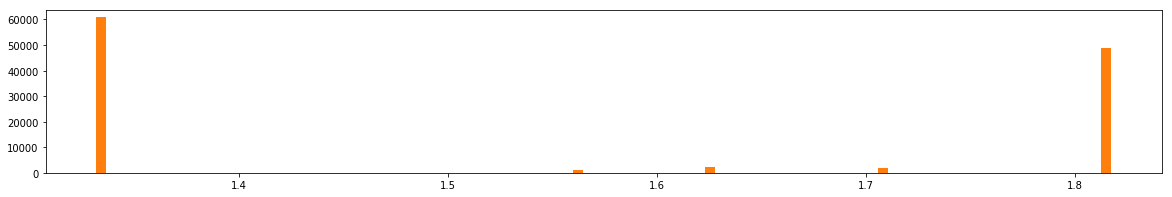

Process Remove Outlier v48 | mean: 1.55197 | std: 0.23711 | min: 0.84065 | max: 2.26329 -> min: 1.33183 | max: 1.81725


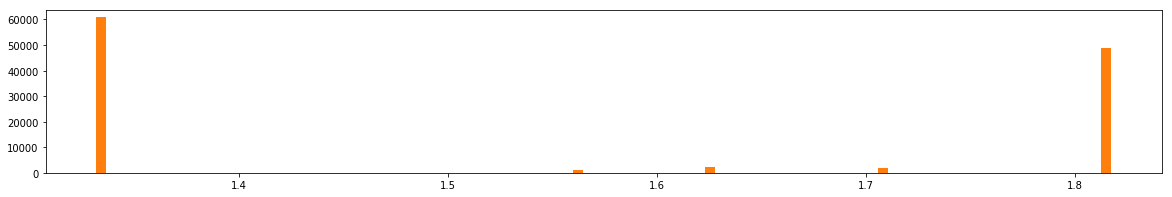

Process Remove Outlier v49 | mean: 1.55197 | std: 0.23711 | min: 0.84065 | max: 2.26329 -> min: 1.33183 | max: 1.81725


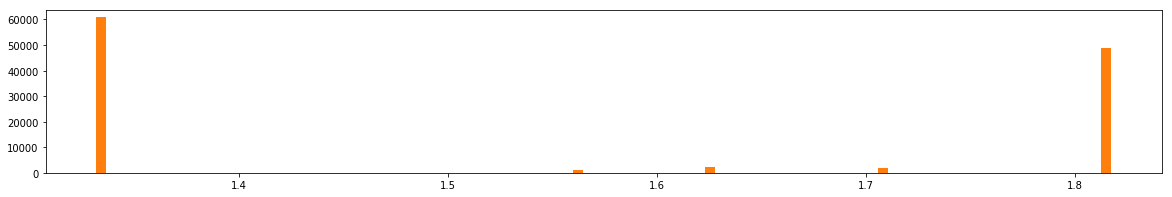

Process Remove Outlier v50 | mean: 1.55194 | std: 0.23721 | min: 0.84031 | max: 2.26357 -> min: 0.95077 | max: 1.81725


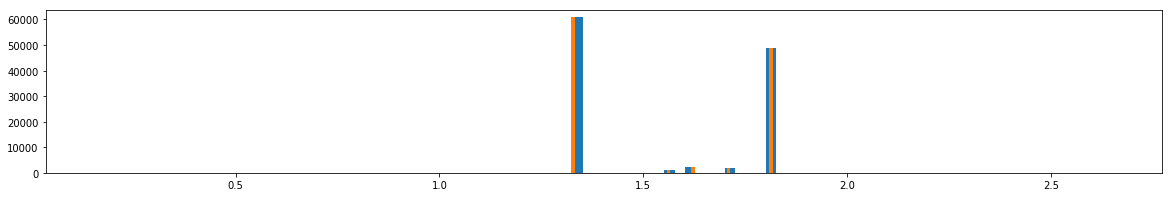

Process Remove Outlier v51 | mean: 1.55197 | std: 0.2371 | min: 0.84067 | max: 2.26327 -> min: 1.33183 | max: 1.81725


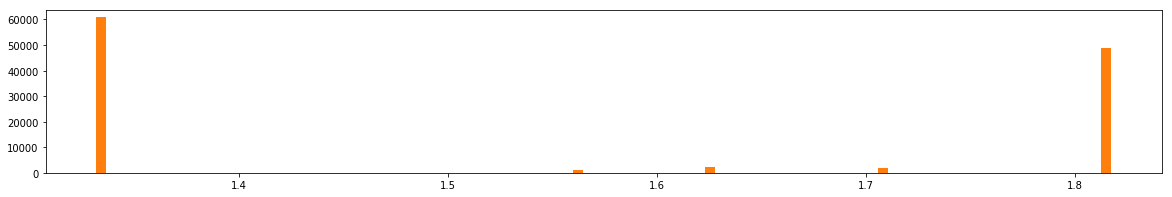

Process Remove Outlier v53 | mean: 1.55197 | std: 0.2371 | min: 0.84067 | max: 2.26327 -> min: 1.33183 | max: 1.81725


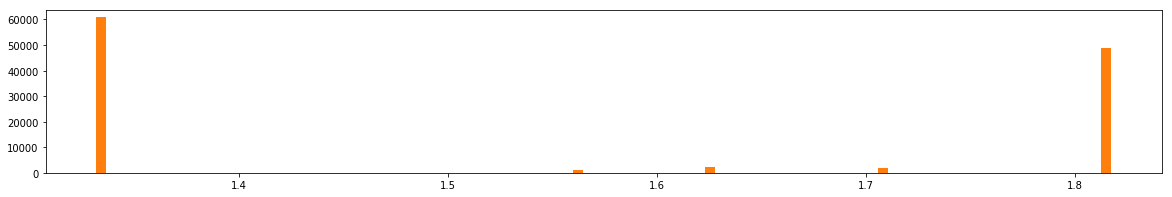

Process Remove Outlier v57 | mean: 1.55197 | std: 0.2371 | min: 0.84067 | max: 2.26327 -> min: 1.33183 | max: 1.81725


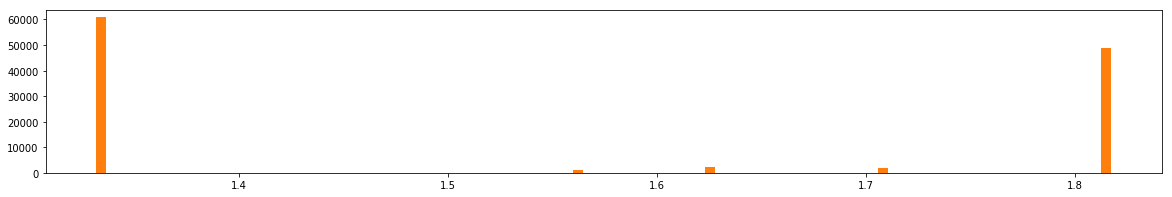

Process Remove Outlier v58 | mean: 1.55197 | std: 0.2371 | min: 0.84067 | max: 2.26327 -> min: 1.33183 | max: 1.81725


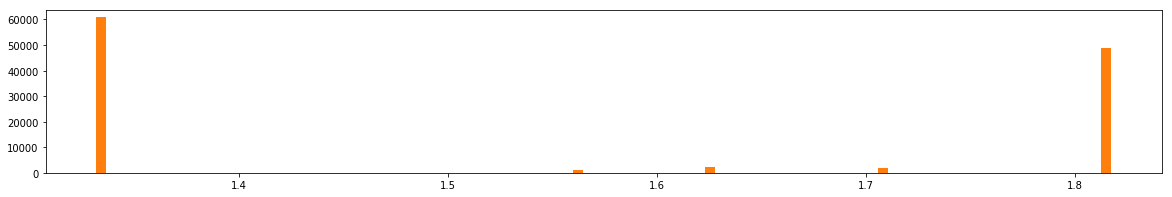

Process Remove Outlier v59 | mean: 1.55197 | std: 0.2371 | min: 0.84067 | max: 2.26327 -> min: 1.33183 | max: 1.81725


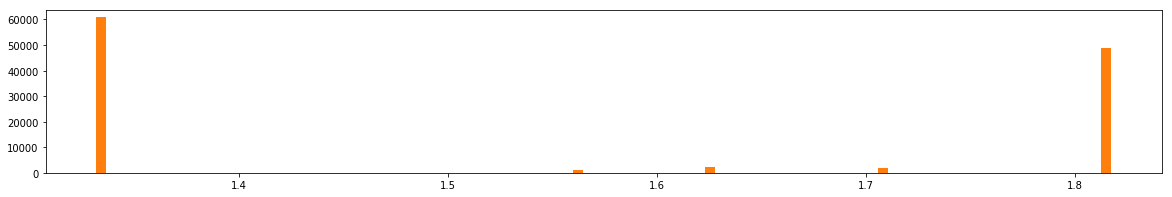

Process Remove Outlier v60 | mean: 1.55197 | std: 0.2371 | min: 0.84067 | max: 2.26327 -> min: 1.33183 | max: 1.81725


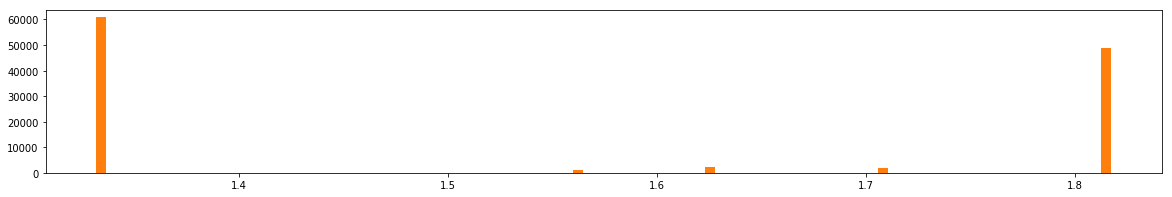

Process Remove Outlier v61 | mean: 1.55197 | std: 0.2371 | min: 0.84067 | max: 2.26327 -> min: 1.33183 | max: 1.81725


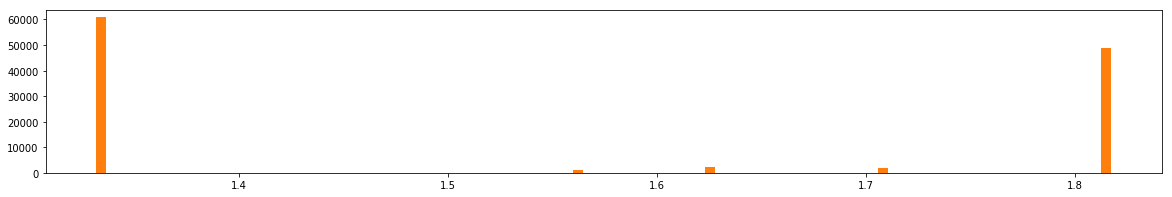

Process Remove Outlier v62 | mean: 1.55194 | std: 0.23719 | min: 0.84036 | max: 2.26352 -> min: 1.0 | max: 1.81725


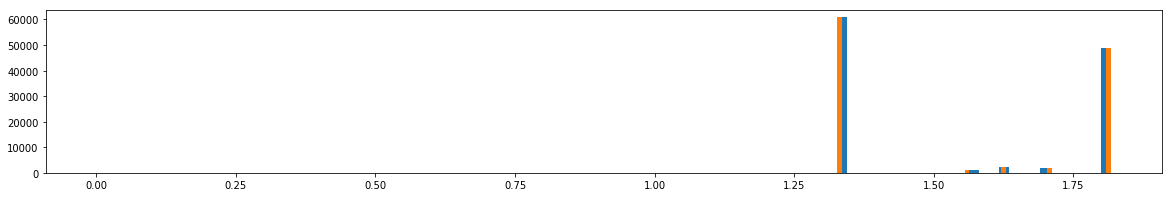

Process Remove Outlier v65 | mean: 1.55197 | std: 0.2371 | min: 0.84067 | max: 2.26327 -> min: 1.33183 | max: 1.81725


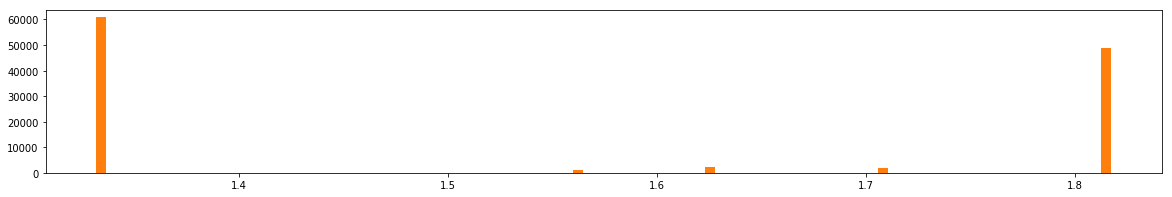

Process Remove Outlier v68 | mean: 1.55197 | std: 0.2371 | min: 0.84067 | max: 2.26327 -> min: 1.33183 | max: 1.81725


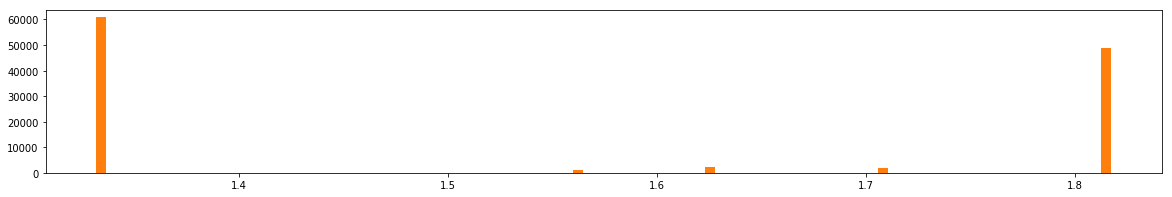

Process Remove Outlier v69 | mean: 1.55197 | std: 0.2371 | min: 0.84067 | max: 2.26327 -> min: 1.33183 | max: 1.81725


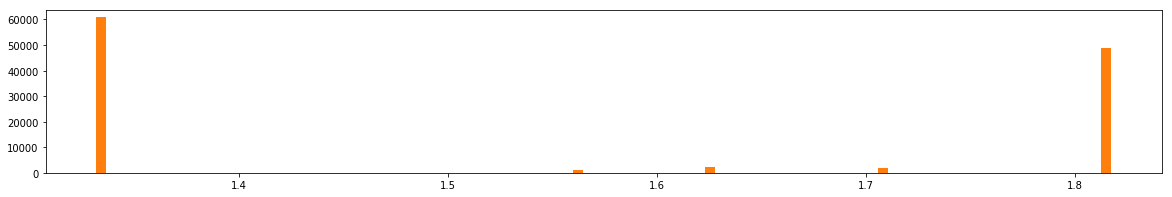

Process Remove Outlier v70 | mean: 1.55197 | std: 0.2371 | min: 0.84067 | max: 2.26327 -> min: 1.33183 | max: 1.81725


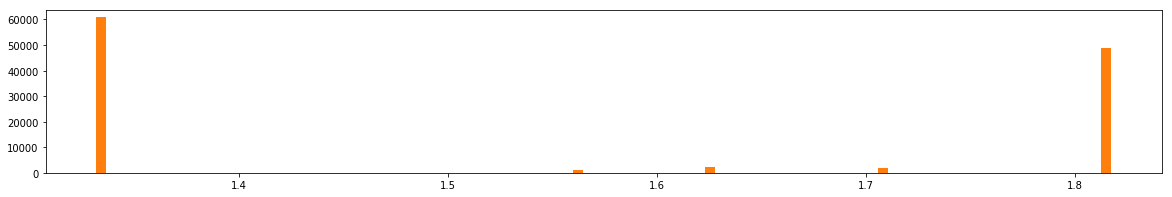

Process Remove Outlier v72 | mean: 1.55199 | std: 0.23714 | min: 0.84058 | max: 2.2634 -> min: 1.33183 | max: 1.81725


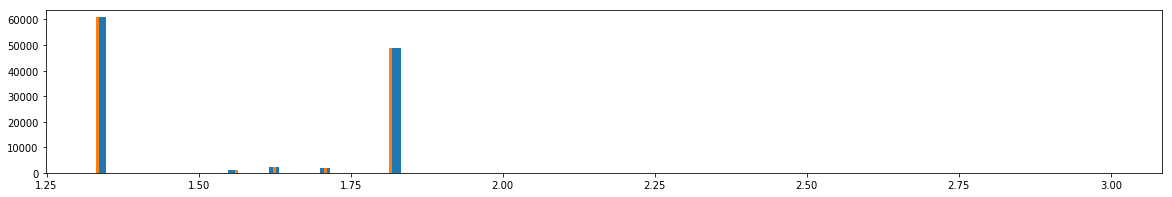

Process Remove Outlier v73 | mean: 1.55197 | std: 0.2371 | min: 0.84068 | max: 2.26326 -> min: 1.33183 | max: 1.81725


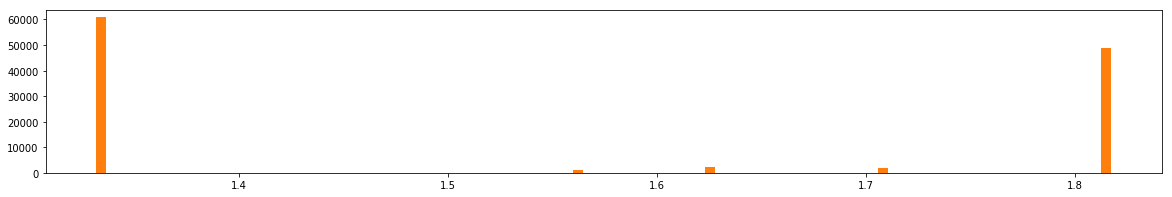

Process Remove Outlier v76 | mean: 1.55197 | std: 0.2371 | min: 0.84068 | max: 2.26326 -> min: 1.33183 | max: 1.81725


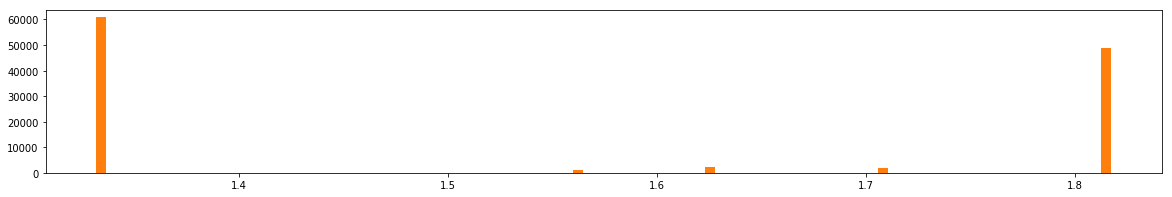

Process Remove Outlier v77 | mean: 1.55197 | std: 0.2371 | min: 0.84068 | max: 2.26326 -> min: 1.33183 | max: 1.81725


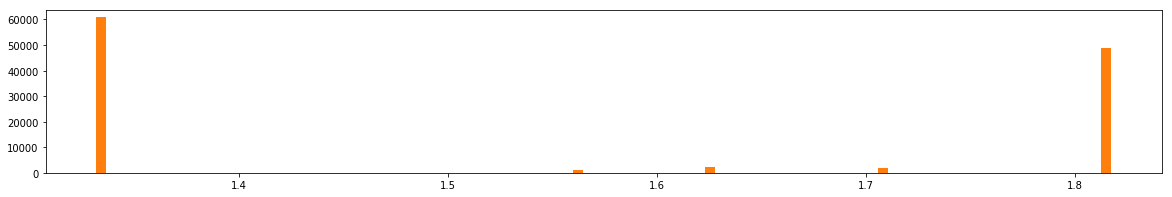

Process Remove Outlier v78 | mean: 1.55197 | std: 0.2371 | min: 0.84068 | max: 2.26326 -> min: 1.33183 | max: 1.81725


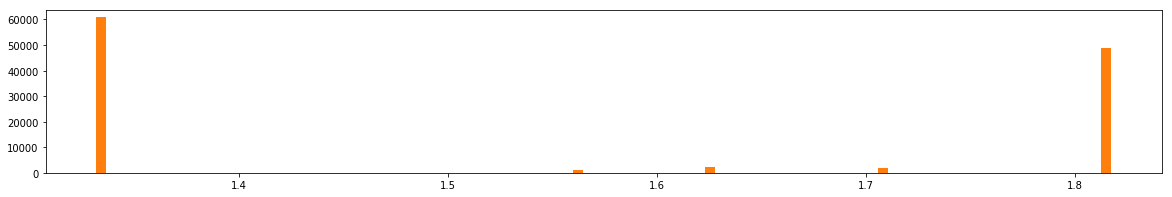

Process Remove Outlier v80 | mean: 1.55197 | std: 0.2371 | min: 0.84068 | max: 2.26326 -> min: 1.33183 | max: 1.81725


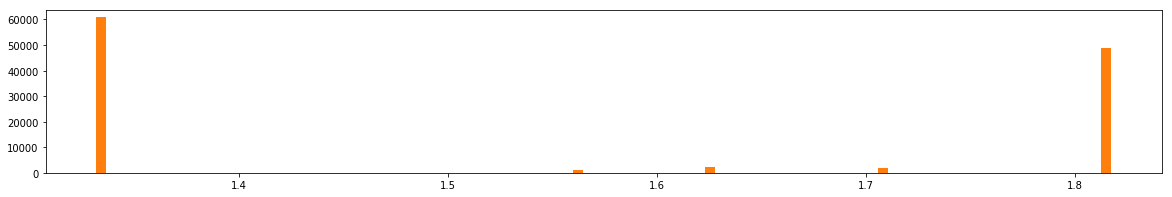

Process Remove Outlier v81 | mean: 1.55197 | std: 0.2371 | min: 0.84068 | max: 2.26326 -> min: 1.33183 | max: 1.81725


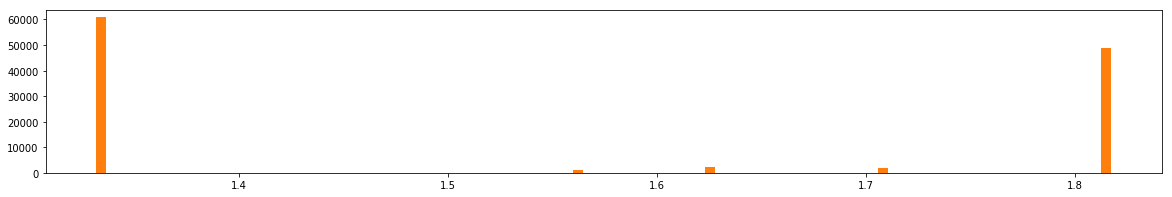

Process Remove Outlier v82 | mean: 1.55197 | std: 0.2371 | min: 0.84068 | max: 2.26326 -> min: 1.33183 | max: 1.81725


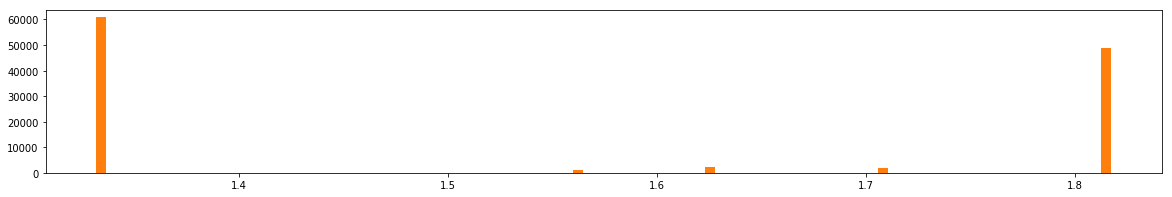

Process Remove Outlier v83 | mean: 1.55197 | std: 0.2371 | min: 0.84068 | max: 2.26326 -> min: 1.33183 | max: 1.81725


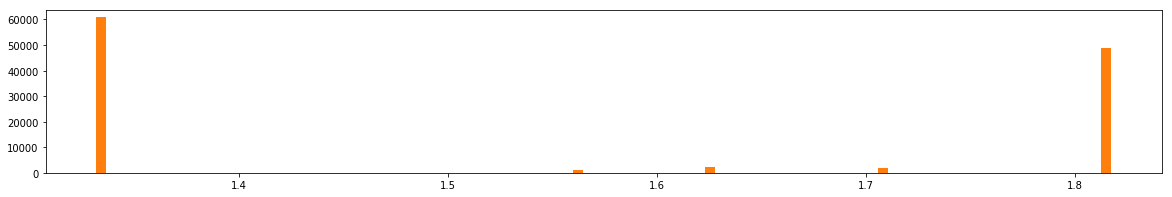

Process Remove Outlier v84 | mean: 1.55197 | std: 0.2371 | min: 0.84068 | max: 2.26326 -> min: 1.33183 | max: 1.81725


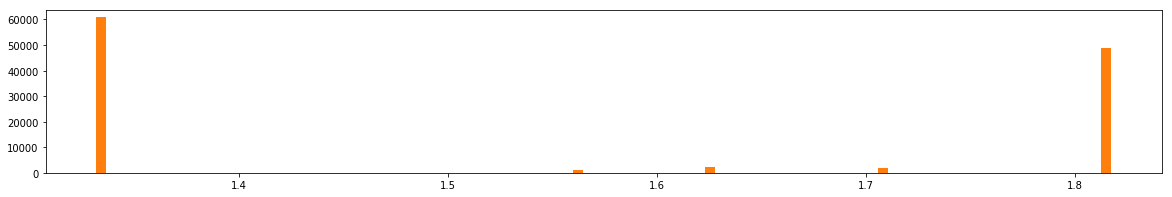

Process Remove Outlier v85 | mean: 1.55197 | std: 0.2371 | min: 0.84068 | max: 2.26326 -> min: 1.33183 | max: 1.81725


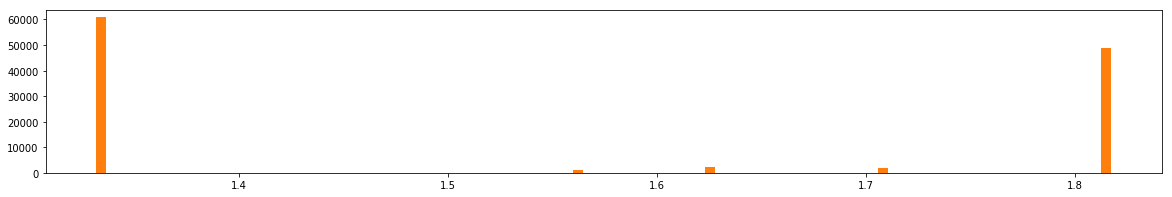

Process Remove Outlier v86 | mean: 1.55197 | std: 0.2371 | min: 0.84068 | max: 2.26326 -> min: 1.33183 | max: 1.81725


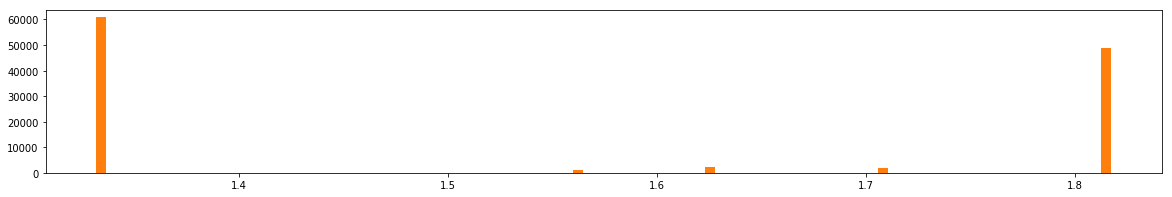

Process Remove Outlier v87 | mean: 1.55197 | std: 0.2371 | min: 0.84068 | max: 2.26326 -> min: 1.33183 | max: 1.81725


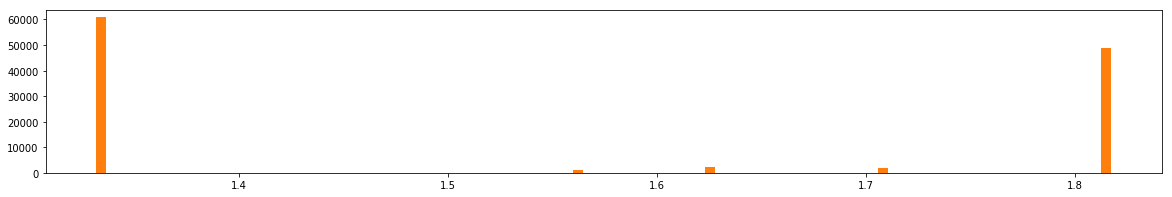

Process Remove Outlier v88 | mean: 1.55197 | std: 0.2371 | min: 0.84068 | max: 2.26326 -> min: 1.33183 | max: 1.81725


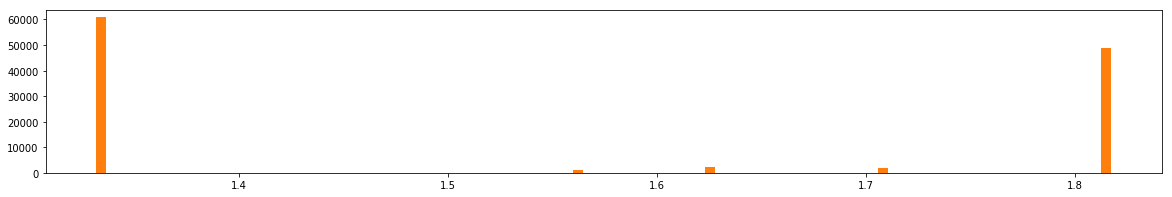

Process Remove Outlier v89 | mean: 1.55197 | std: 0.2371 | min: 0.84068 | max: 2.26326 -> min: 1.33183 | max: 1.81725


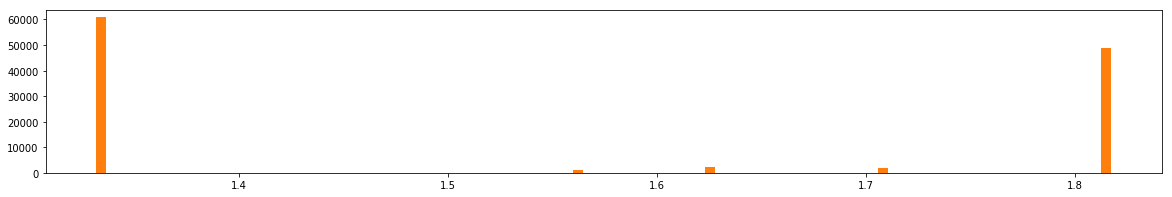

Process Remove Outlier v90 | mean: 1.55197 | std: 0.2371 | min: 0.84068 | max: 2.26326 -> min: 1.33183 | max: 1.81725


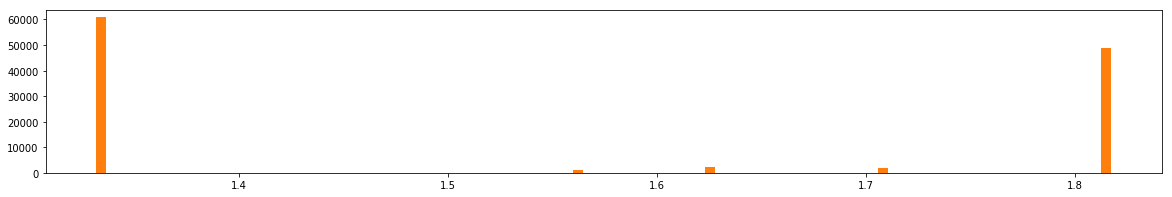

Process Remove Outlier v93 | mean: 1.55197 | std: 0.2371 | min: 0.84068 | max: 2.26326 -> min: 1.33183 | max: 1.81725


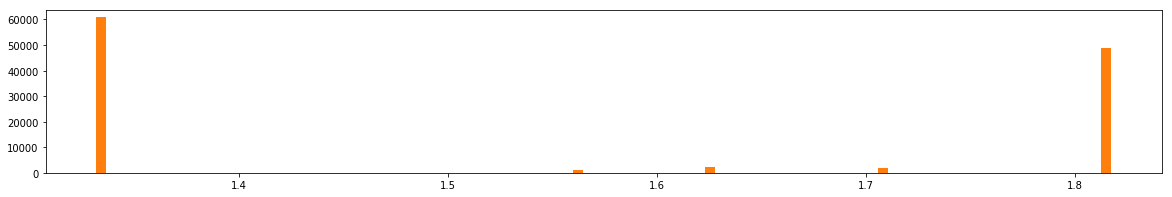

Process Remove Outlier v94 | mean: 1.55197 | std: 0.2371 | min: 0.84068 | max: 2.26326 -> min: 1.33183 | max: 1.81725


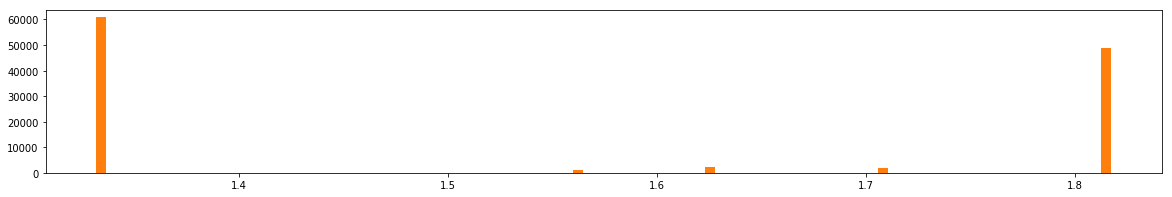

Process Remove Outlier v95 | mean: 1.55197 | std: 0.2371 | min: 0.84068 | max: 2.26326 -> min: 1.33183 | max: 1.81725


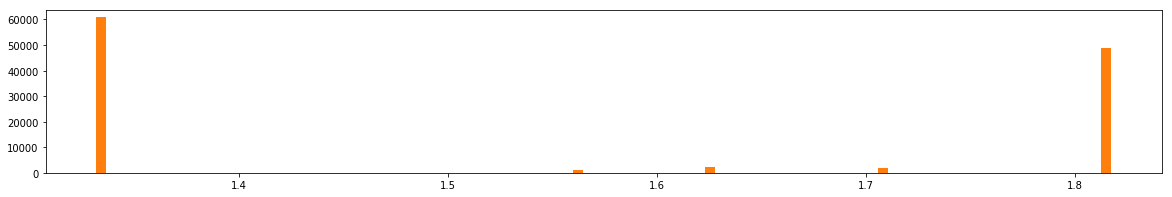

Process Remove Outlier v96 | mean: 1.55197 | std: 0.2371 | min: 0.84068 | max: 2.26326 -> min: 1.33183 | max: 1.81725


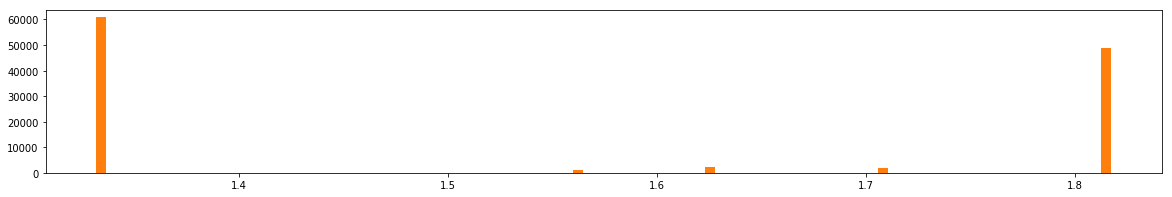

Process Remove Outlier v97 | mean: 1.55197 | std: 0.2371 | min: 0.84068 | max: 2.26326 -> min: 1.33183 | max: 1.81725


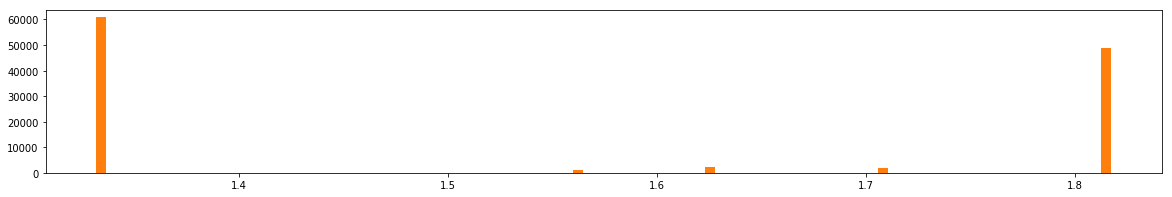

Process Remove Outlier v98 | mean: 1.55197 | std: 0.2371 | min: 0.84068 | max: 2.26326 -> min: 1.33183 | max: 1.81725


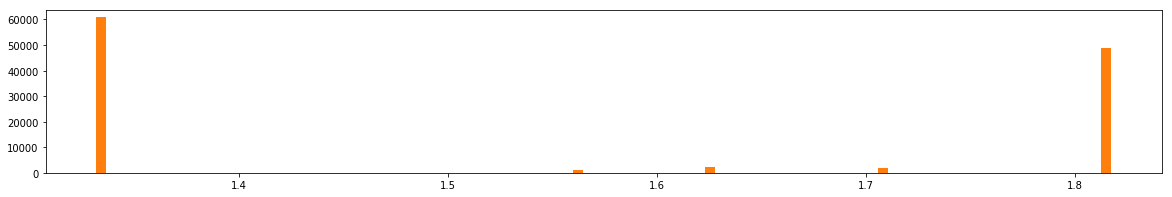

Process Remove Outlier v99 | mean: 1.55197 | std: 0.2371 | min: 0.84068 | max: 2.26326 -> min: 1.33183 | max: 1.81725


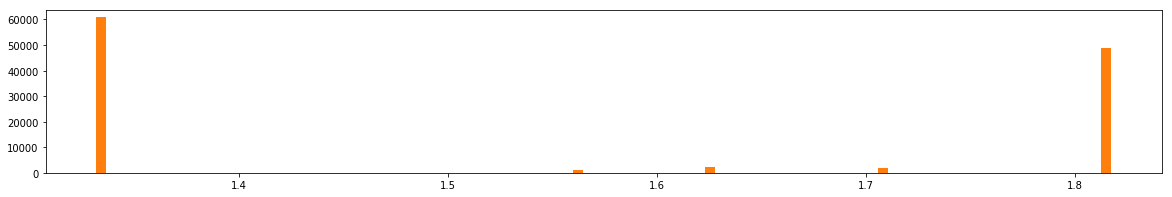

Process Remove Outlier v100 | mean: 1.55197 | std: 0.2371 | min: 0.84068 | max: 2.26326 -> min: 1.33183 | max: 1.81725


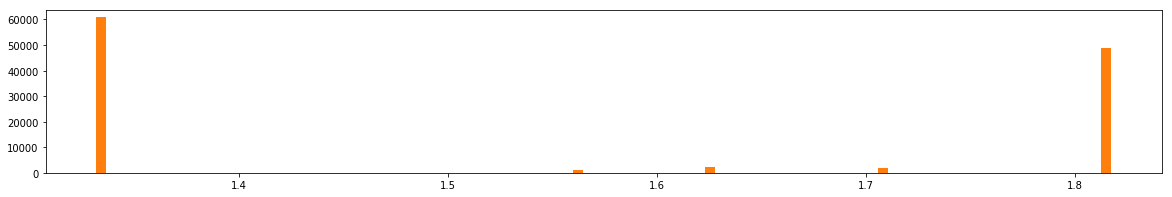

Process Remove Outlier v101 | mean: 1.55197 | std: 0.2371 | min: 0.84068 | max: 2.26326 -> min: 1.33183 | max: 1.81725


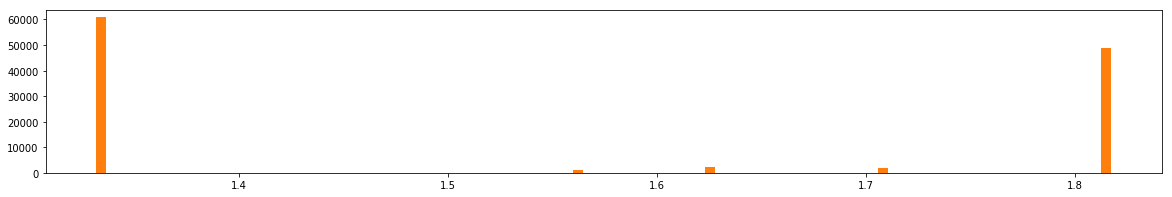

Process Remove Outlier v102 | mean: 1.55197 | std: 0.2371 | min: 0.84068 | max: 2.26326 -> min: 1.33183 | max: 1.81725


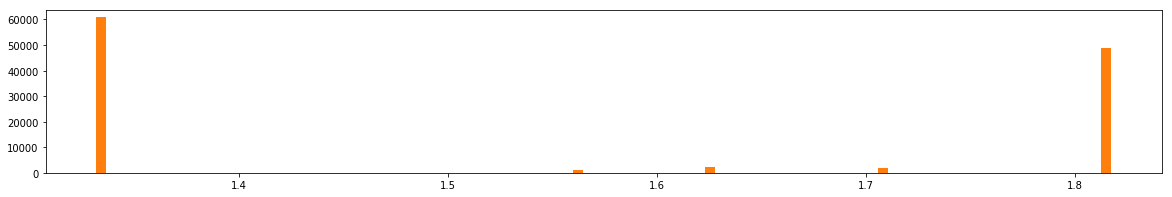

Process Remove Outlier v103 | mean: 1.55197 | std: 0.2371 | min: 0.84068 | max: 2.26326 -> min: 1.33183 | max: 1.81725


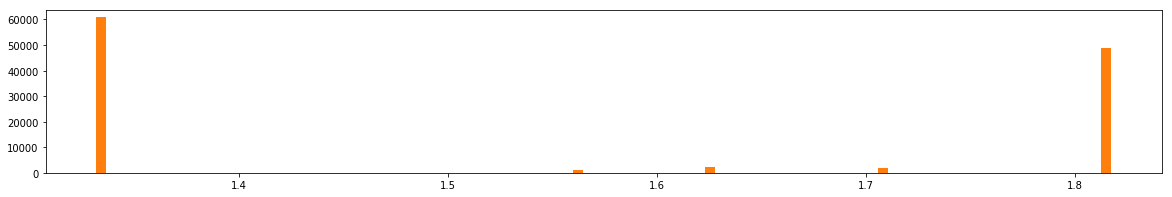

Process Remove Outlier v106 | mean: 1.55197 | std: 0.2371 | min: 0.84068 | max: 2.26326 -> min: 1.33183 | max: 1.81725


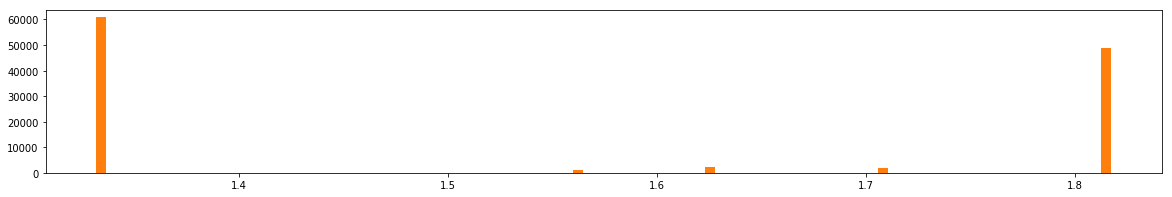

Process Remove Outlier v108 | mean: 1.55197 | std: 0.2371 | min: 0.84068 | max: 2.26326 -> min: 1.33183 | max: 1.81725


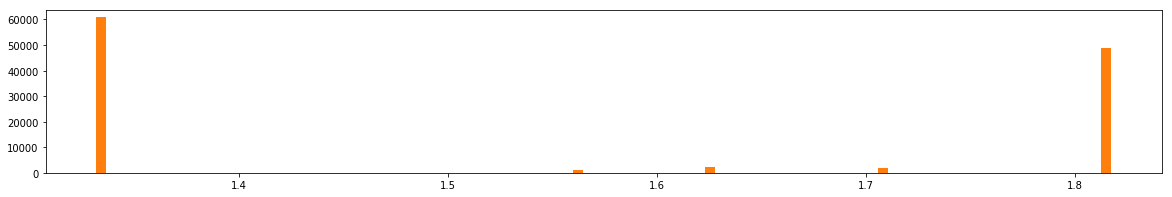

Process Remove Outlier v111 | mean: 1.55197 | std: 0.2371 | min: 0.84068 | max: 2.26326 -> min: 1.33183 | max: 1.81725


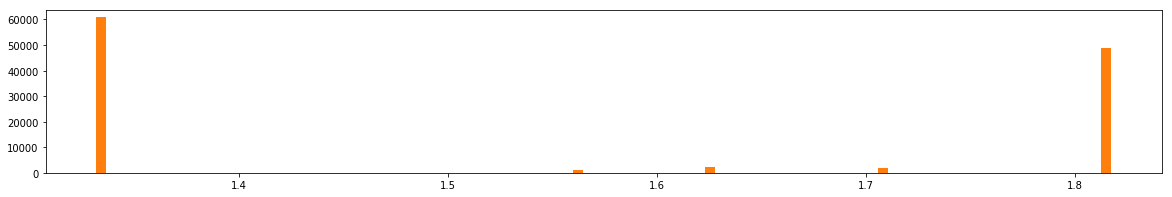

Process Remove Outlier v115 | mean: 1.55197 | std: 0.2371 | min: 0.84068 | max: 2.26326 -> min: 1.33183 | max: 1.81725


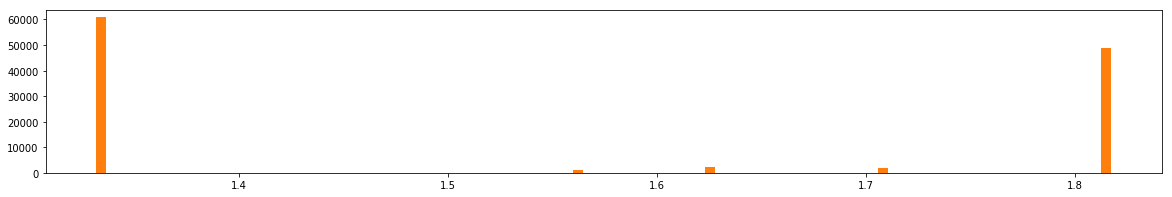

Process Remove Outlier v116 | mean: 1.55197 | std: 0.2371 | min: 0.84068 | max: 2.26326 -> min: 1.33183 | max: 1.81725


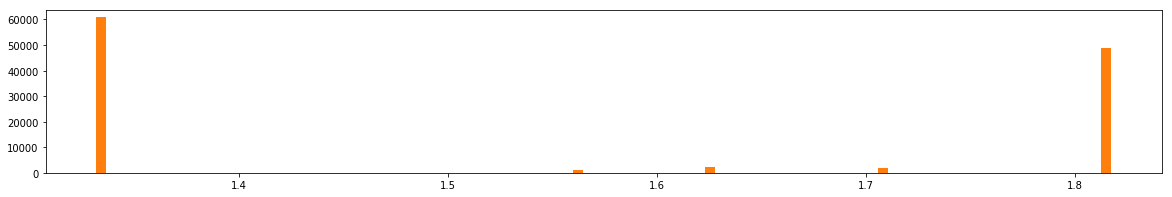

Process Remove Outlier v117 | mean: 1.55197 | std: 0.2371 | min: 0.84068 | max: 2.26326 -> min: 1.33183 | max: 1.81725


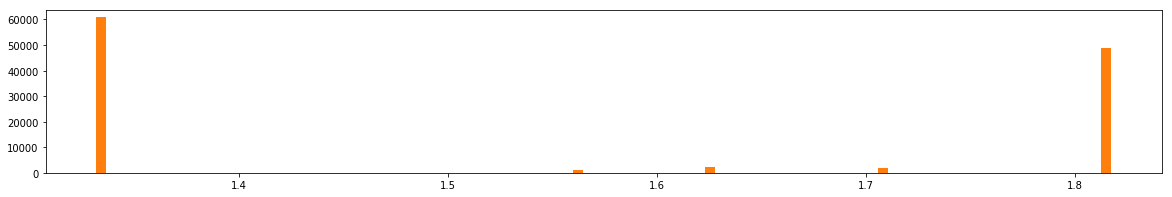

Process Remove Outlier v119 | mean: 1.55197 | std: 0.2371 | min: 0.84068 | max: 2.26326 -> min: 1.33183 | max: 1.81725


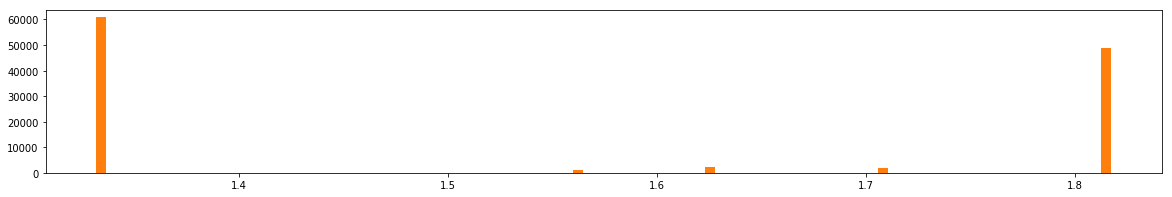

Process Remove Outlier v120 | mean: 1.55197 | std: 0.2371 | min: 0.84068 | max: 2.26326 -> min: 1.33183 | max: 1.81725


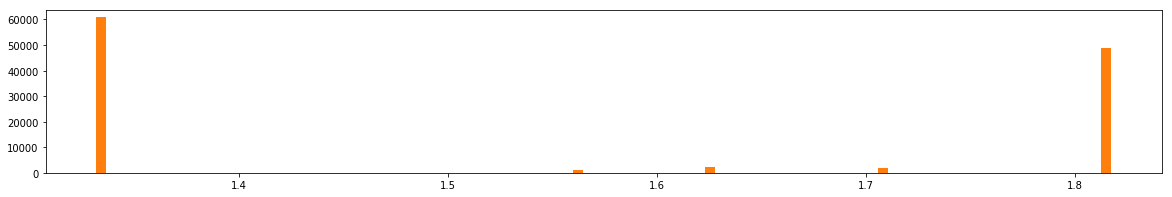

Process Remove Outlier v122 | mean: 1.55197 | std: 0.2371 | min: 0.84068 | max: 2.26326 -> min: 1.33183 | max: 1.81725


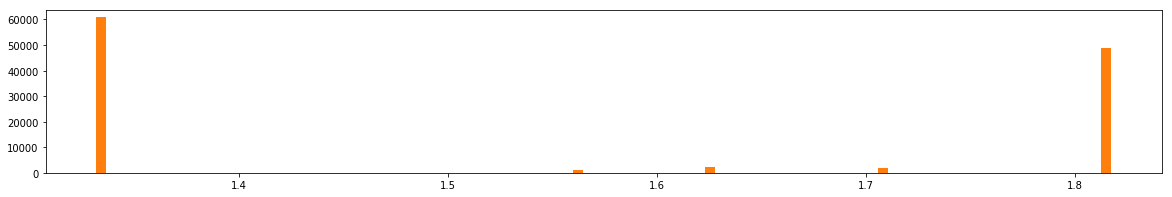

Process Remove Outlier v123 | mean: 1.55197 | std: 0.2371 | min: 0.84068 | max: 2.26326 -> min: 1.33183 | max: 1.81725


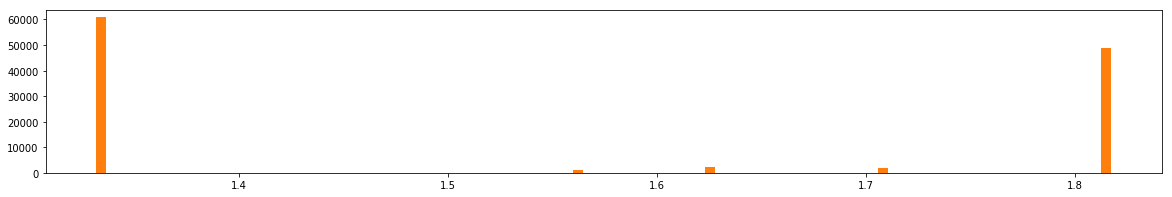

Process Remove Outlier v124 | mean: 1.55197 | std: 0.2371 | min: 0.84068 | max: 2.26326 -> min: 1.33183 | max: 1.81725


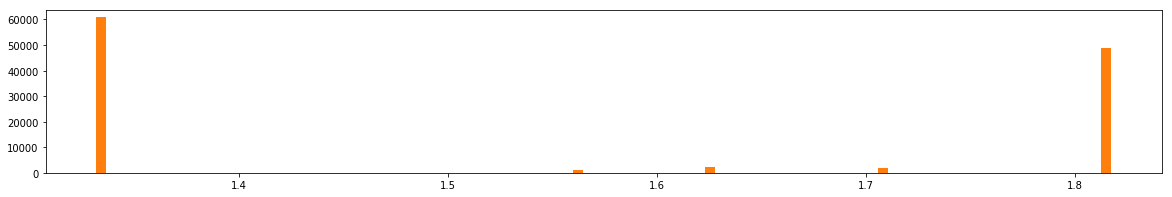

Process Remove Outlier v126 | mean: 1.55197 | std: 0.2371 | min: 0.84068 | max: 2.26326 -> min: 1.33183 | max: 1.81725


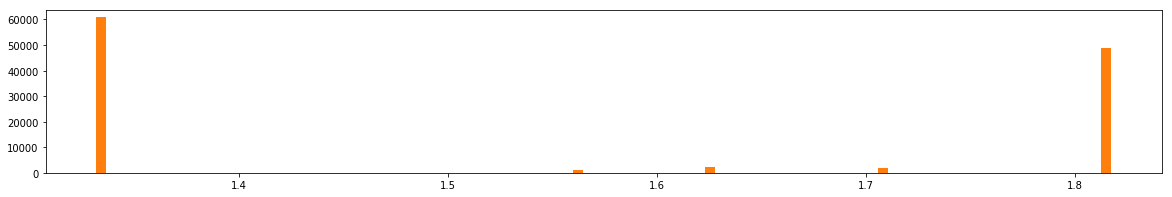

Process Remove Outlier v127 | mean: 1.55197 | std: 0.2371 | min: 0.84068 | max: 2.26326 -> min: 1.33183 | max: 1.81725


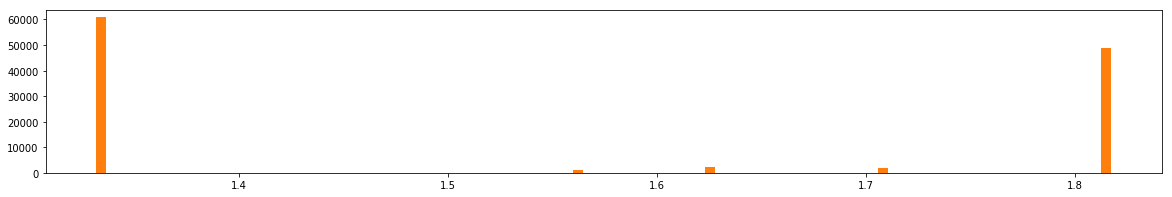

Process Remove Outlier v128 | mean: 1.55197 | std: 0.2371 | min: 0.84068 | max: 2.26326 -> min: 1.33183 | max: 1.81725


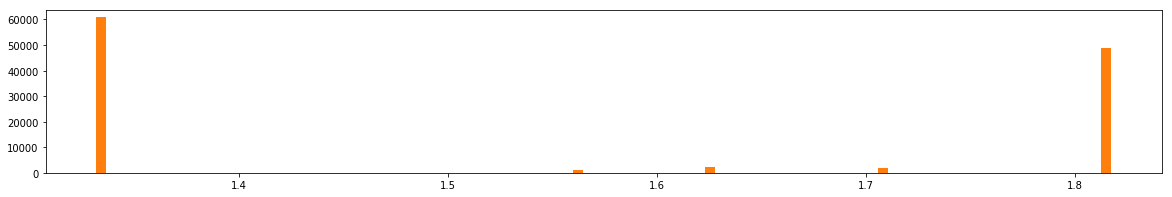

Process Remove Outlier v129 | mean: 1.55197 | std: 0.2371 | min: 0.84068 | max: 2.26326 -> min: 1.33183 | max: 1.81725


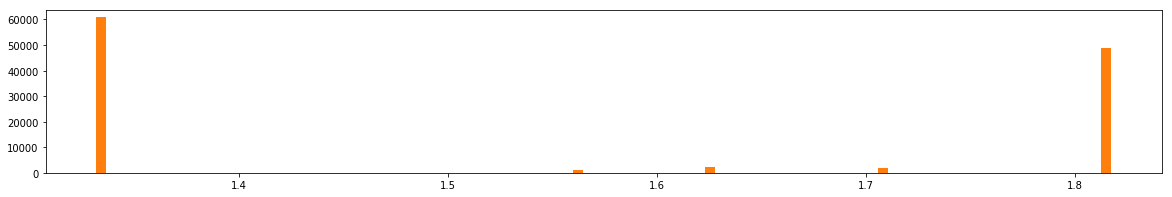

Process Remove Outlier v130 | mean: 1.55197 | std: 0.2371 | min: 0.84068 | max: 2.26326 -> min: 1.33183 | max: 1.81725


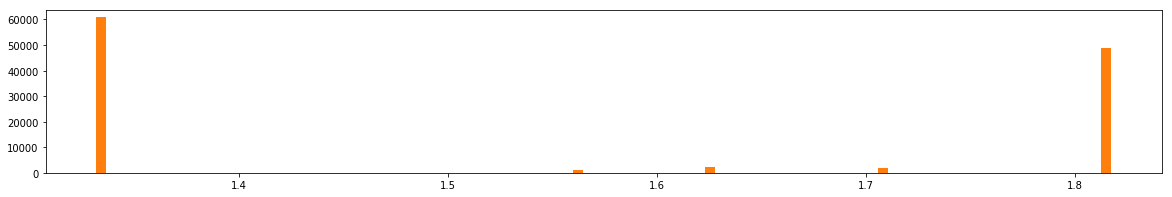

Process Remove Outlier v131 | mean: 1.55197 | std: 0.2371 | min: 0.84068 | max: 2.26326 -> min: 1.33183 | max: 1.81725


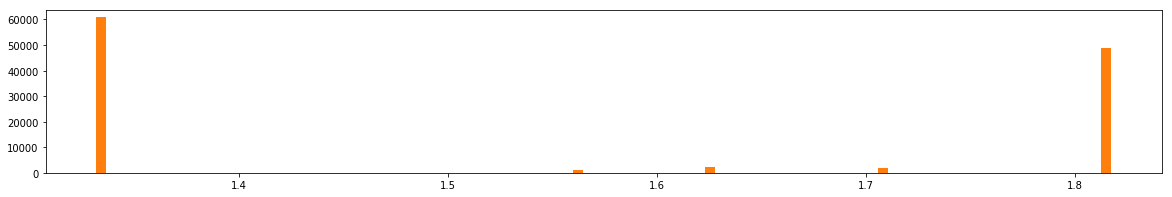

In [23]:
for col in test.columns[1:132]:
    remove_outlier(test, col)

In [24]:
train.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74,v75,v76,v77,v78,v79,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131,v3_C,v3_A,v3_B,v24_C,v24_E,v24_D,v24_A,v24_B,v30_C,v30_G,v30_D,v30_B,v30_F,v30_A,v30_E,v31_A,v31_B,v31_C,v47_C,v47_E,v47_I,v47_D,v47_F,v47_G,v47_J,v47_B,v47_A,v47_H,v52_G,v52_F,v52_H,v52_K,v52_A,v52_C,v52_E,v52_J,v52_D,v52_I,v52_L,v52_B,v56_I,v56_D,v56_Y,v56_A,v56_S,v56_W,v56_B,v56_X,v56_P,v56_F,v56_C,v56_L,v56_Z,v56_N,v56_Q,v56_M,v56_G,v56_J,v56_V,v56_R,v56_U,v56_O,v56_H,v56_K,v56_E,v56_T,v66_C,v66_A,v66_B,v71_F,v71_B,v71_C,v71_L,v71_I,v71_A,v71_G,v71_K,v71_D,v74_B,v74_C,v74_A,v75_D,v75_B,v75_C,v75_A,v79_E,v79_D,v79_B,v79_C,v79_I,v79_P,v79_A,v79_O,v79_K,v79_M,v79_J,v79_H,v79_F,v79_Q,v79_R,v79_N,v79_G,v79_L,v91_A,v91_B,v91_G,v91_C,v91_F,v91_E,v91_D,v107_E,v107_B,v107_C,v107_D,v107_A,v107_F,v107_G,v110_B,v110_A,v110_C,v112_O,v112_U,v112_S,v112_J,v112_T,v112_D,v112_I,v112_F,v112_L,v112_M,v112_E,v112_H,v112_N,v112_R,v112_P,v112_A,v112_B,v112_K,v112_G,v112_C,v112_Q,v112_V,v113_G,v113_X,v113_M,v113_P,v113_S,v113_I,v113_A,v113_C,v113_W,v113_L,v113_B,v113_F,v113_V,v113_N,v113_T,v113_U,v113_E,v113_J,v113_Q,v113_R,v113_Y,v113_H,v113_Z,v113_D,v113_O,v113_K,v125_A,v125_U,v125_F,v125_E,v125_C,v125_J,v125_Z,v125_X,v125_B,v125_Y,v125_S,v125_R,v125_M,v125_Q,v125_D,v125_G,v125_N,v125_P,v125_W,v125_K,v125_O,v125_L,v125_V,v125_T,v125_H,v125_I
0,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.82081,1.8

In [25]:
train.to_csv('fe_train.csv', index=False)

In [26]:
test.to_csv('fe_test.csv', index=False)